# Light Spectroscopy Lab Data Processing:

## This notebook will go through the data analysis required to process raw data from a spectrometer into spectral plots of different elements.

## Here are the packages that will be needed to process the light spectroscopy data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

# $***************************************$

# Analyzing Hydrogen Data:

## Here the data is loaded in and the raw data is plotted.

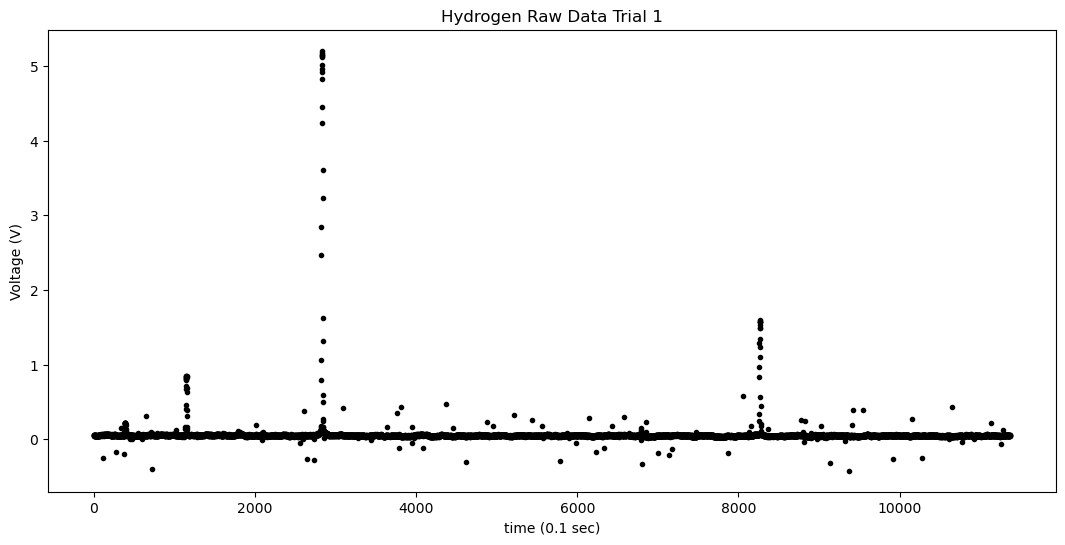

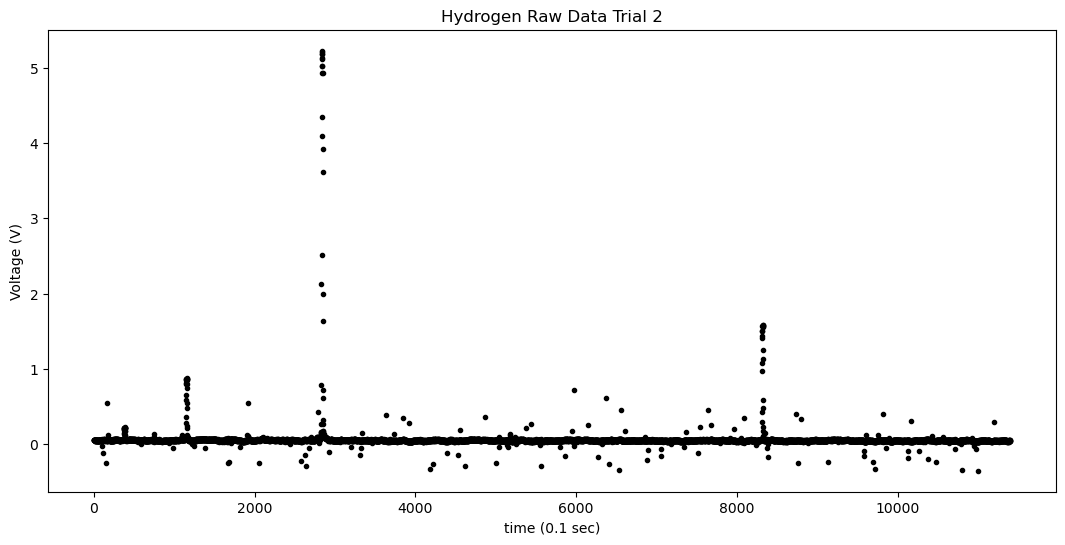

In [2]:
# Loading in the data
hydrogen_run1 = np.loadtxt("H_data1", skiprows=4, usecols=1, delimiter=",", dtype="float")

# Runtime of the experiment in seconds
hydrogen_runtime1 = np.arange(0,len(hydrogen_run1))

# Loading in the data
hydrogen_run2 = np.loadtxt("H_data2", skiprows=4, usecols=1, delimiter=",", dtype="float")

# Runtime of the experiment in seconds
hydrogen_runtime2 = np.arange(0,len(hydrogen_run2))

# Plotting Voltage vs. # Data Points
plt.figure(figsize=(13,6))
plt.plot(hydrogen_runtime1, hydrogen_run1, '.', color='k')
plt.title("Hydrogen Raw Data Trial 1")
plt.xlabel("time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

plt.figure(figsize=(13,6))
plt.plot(hydrogen_runtime2, hydrogen_run2, '.', color='k')
plt.title("Hydrogen Raw Data Trial 2")
plt.xlabel("time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

# $***************************************$

# Hydrogen Trial 1:

## This box of code will create a gaussian fit for two peaks in the data and determine the time value that corresponds to each peaks.

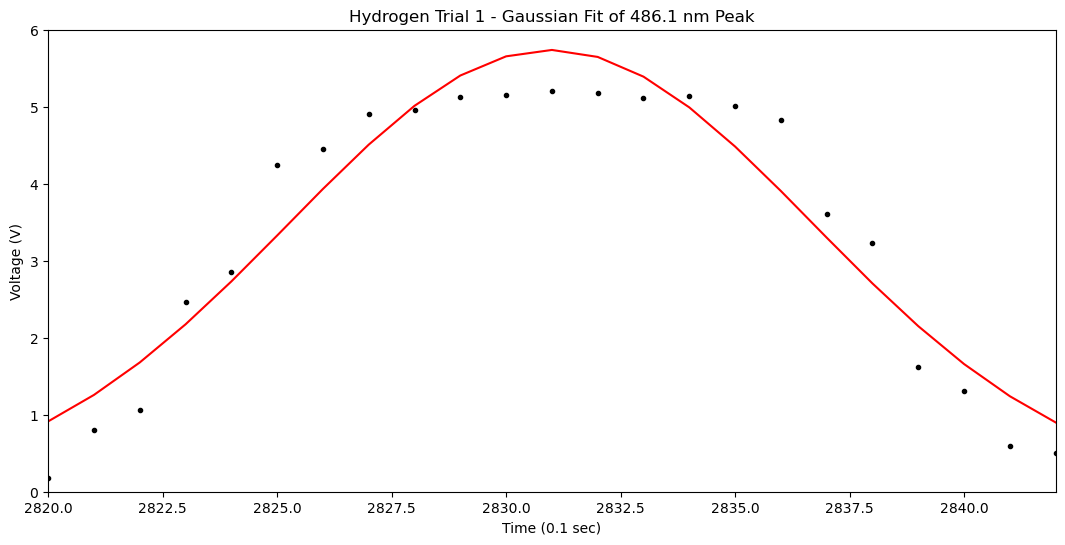

The time value corresponding to the wavelength 486.1 nm is: 2830.97 +/- 0.06 deciseconds.


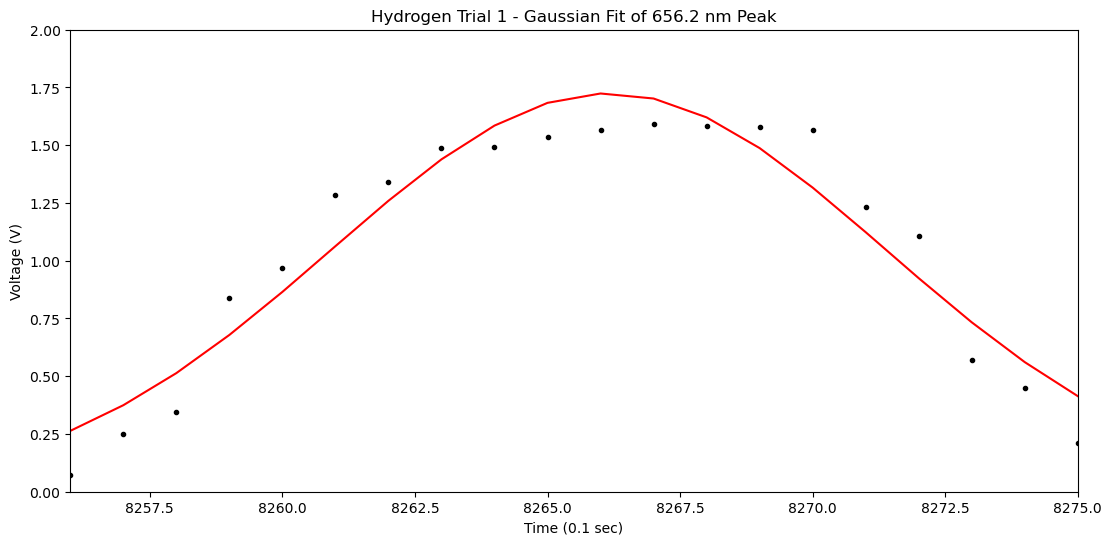

The time value corresponding to the wavelength 656.2 nm is: 8266.15 +/- 0.05 deciseconds.


In [3]:
# Creating Gaussian Fit Function
def GaussianFit(x, xbar, sigma, A):
    return A * np.exp(-(x-xbar)**2 / (2*sigma**2))

# For the first peak:
# A peak was found between the time values 2820-2842
# These values correspond to hydrogen's 486.1 nm peak

# Initial Values for 486.1 nm peak
hydrogen_trial1_peak1_param0 = (50, 2800, 10)

# Fitting the 486.1 nm peak to the Gaussian
hydrogen_trial1_paramFit1, hydrogen_trial1_paramErr1 = optimize.curve_fit(GaussianFit,
                                                            hydrogen_runtime1[2820:2843],
                                                            hydrogen_run1[2820:2843],
                                                            hydrogen_trial1_peak1_param0)

# Calculating values of the gaussian
hydrogen_trial1_fit1 = GaussianFit(hydrogen_runtime1[2820:2843],
                            hydrogen_trial1_paramFit1[0],
                            hydrogen_trial1_paramFit1[1],
                            hydrogen_trial1_paramFit1[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([2820,2842])
plt.ylim([0,6])
plt.plot(hydrogen_runtime1[2820:2843], hydrogen_trial1_fit1, color='r')
plt.plot(hydrogen_runtime1, hydrogen_run1, '.', color='k')
plt.title("Hydrogen Trial 1 - Gaussian Fit of 486.1 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 486.1 nm is:", str(hydrogen_trial1_paramFit1[0])[:7],
      "+/-", str(hydrogen_trial1_paramErr1[0][0])[:4], "deciseconds.")


# For the second peak:
# A peak was found between the time values 8256-8275
# These values correspond to hydrogen's 656.2 nm peak

# Initial Values for 656.2 nm peak
hydrogen_trial1_peak2_param0 = (100, 8500, 1)

# Fitting the 656.2 nm peak to the Gaussian
hydrogen_trial1_paramFit2, hydrogen_trial1_paramErr2 = optimize.curve_fit(GaussianFit,
                                                            hydrogen_runtime1[8256:8276],
                                                            hydrogen_run1[8256:8276],
                                                            hydrogen_trial1_peak2_param0)

# Calculating values of the gaussian
hydrogen_trial1_fit2 = GaussianFit(hydrogen_runtime1[8256:8276],
                            hydrogen_trial1_paramFit2[0],
                            hydrogen_trial1_paramFit2[1],
                            hydrogen_trial1_paramFit2[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([8256,8275])
plt.ylim([0,2])
plt.plot(hydrogen_runtime1[8256:8276], hydrogen_trial1_fit2, color='r')
plt.plot(hydrogen_runtime1, hydrogen_run1, '.', color='k')
plt.title("Hydrogen Trial 1 - Gaussian Fit of 656.2 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 656.2 nm is:", str(hydrogen_trial1_paramFit2[0])[:7],
      "+/-", str(hydrogen_trial1_paramErr2[0][0])[:4], "deciseconds.")

## Converting Time to Wavelength:

### In order to get the x-axis from time into wavelength, the two must be related through a function. A function of wavelength as a function of time should be the linear function $\, \lambda(t) = mt\, +\, b\, $. This means that the slope of this function will give the conversion factor between time and wavelength. This slope can be calculated as follows:

## $ m = \frac{\Delta{\lambda}}{\Delta{t}} = \frac{\lambda_{2}\, -\, \lambda_{1}}{t_{2}\, -\, t_{1}} = \frac{656.2\, nm\, -\, 486.1\, nm}{8266.15\, ds\, -\, 2830.97\, ds} $
## $ m = 3.129\, x\, 10^{-2}\, \frac{nm}{ds}$

### Calculating Error in Slope:

## $ \sigma_{m} = \sqrt{(\frac{\partial{m}}{\partial{(\Delta{\lambda})}}\sigma_{\Delta{\lambda}})^{2}\, +\, (\frac{\partial{m}}{\partial{(\Delta{t})}}\sigma_{\Delta{t}})^{2}} $

## $ \sigma_{m} = \sqrt{(\frac{\sigma_{\Delta{\lambda}}}{\Delta{t}})^{2}\, +\, (-\frac{\Delta{\lambda}}{\Delta{t^{2}}}\sigma_{\Delta{t}})^{2}} $

## $\, \sigma_{\Delta{\lambda}} = 0.05\, $ and $\, \sigma_{\Delta{t}} = 0.11\, $, giving:

## $ \sigma_{m} = \sqrt{(\frac{0.05}{8266.15\, ds\, -\, 2830.97\, ds})^{2}\, +\, (-(\frac{656.2\, nm\, -\, 486.1\, nm}{({8266.15\, ds\, -\, 2830.97\, ds})^{2}})0.11)^{2}} $

## $ \sigma_{m} = 0.0009\, x\, 10^{-2} $

# Hydrogen Trial 2:

## This box of code will create a gaussian fit for two peaks in the data and determine the time value that corresponds to each peaks.

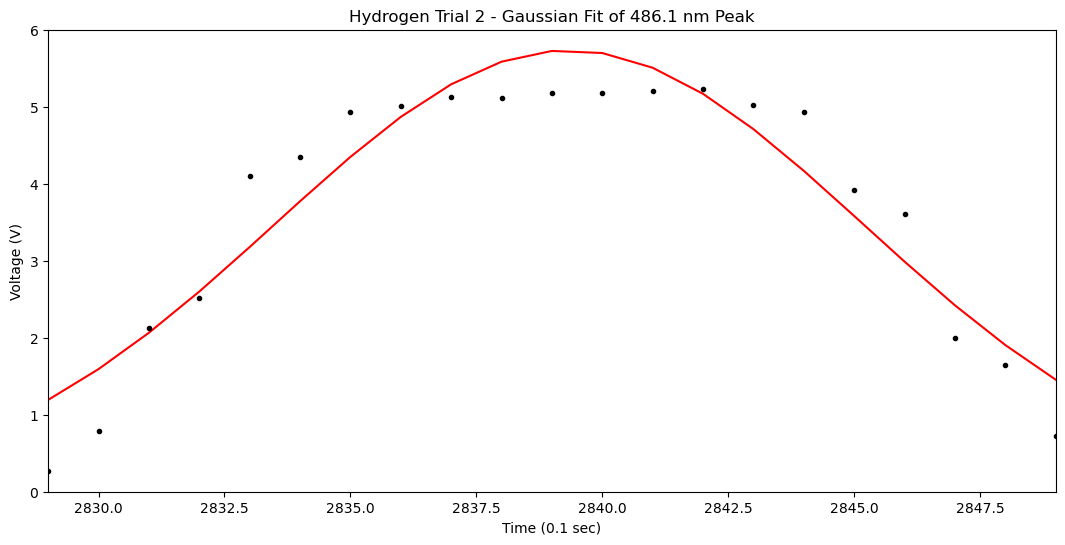

The time value corresponding to the wavelength 486.1 nm is: 2839.33 +/- 0.07 deciseconds.


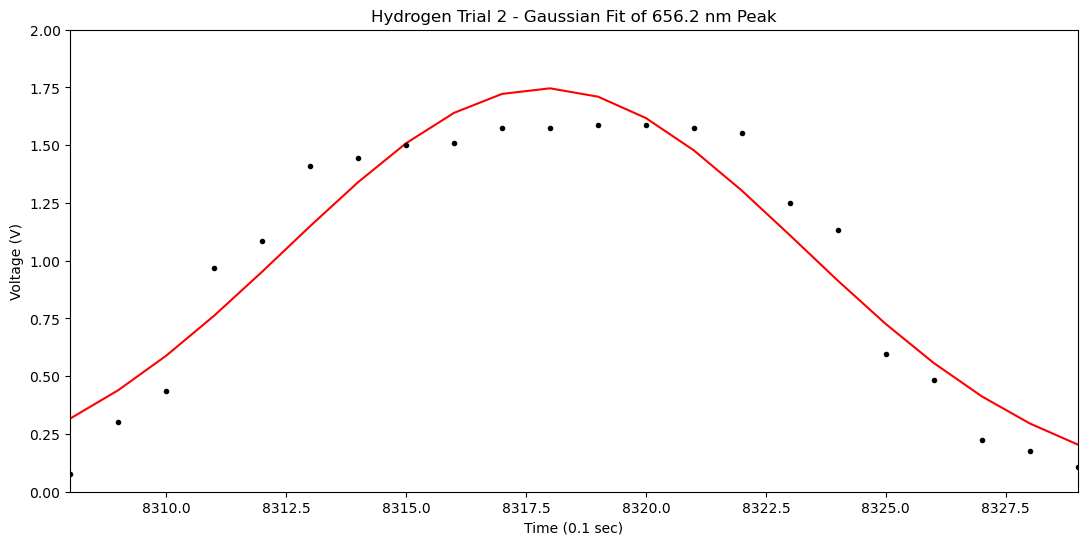

The time value corresponding to the wavelength 656.2 nm is: 8317.89 +/- 0.05 deciseconds.


In [4]:
# For the first peak:
# A peak was found between the time values -
# These values correspond to hydrogen's 486.1 nm peak

# Initial Values for 486.1 nm peak
hydrogen_trial2_peak1_param0 = (300, 2000, 10)

# Fitting the 486.1 nm peak to the Gaussian
hydrogen_trial2_paramFit1, hydrogen_trial2_paramErr1 = optimize.curve_fit(GaussianFit,
                                                            hydrogen_runtime2[2829:2850],
                                                            hydrogen_run2[2829:2850],
                                                            hydrogen_trial2_peak1_param0)

# Calculating values of the gaussian
hydrogen_trial2_fit1 = GaussianFit(hydrogen_runtime2[2829:2850],
                            hydrogen_trial2_paramFit1[0],
                            hydrogen_trial2_paramFit1[1],
                            hydrogen_trial2_paramFit1[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([2829,2849])
plt.ylim([0,6])
plt.plot(hydrogen_runtime2[2829:2850], hydrogen_trial2_fit1, color='r')
plt.plot(hydrogen_runtime2, hydrogen_run2, '.', color='k')
plt.title("Hydrogen Trial 2 - Gaussian Fit of 486.1 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 486.1 nm is:", str(hydrogen_trial2_paramFit1[0])[:7],
      "+/-", str(hydrogen_trial2_paramErr1[0][0])[:4], "deciseconds.")


# For the second peak:
# A peak was found between the time values -
# These values correspond to hydrogen's 656.2 nm peak

# Initial Values for 656.2 nm peak
hydrogen_trial2_peak2_param0 = (100, 9000, 10)

# Fitting the  nm peak to the Gaussian
hydrogen_trial2_paramFit2, hydrogen_trial2_paramErr2 = optimize.curve_fit(GaussianFit,
                                                            hydrogen_runtime2[8308:8330],
                                                            hydrogen_run2[8308:8330],
                                                            hydrogen_trial2_peak2_param0)

# Calculating values of the gaussian
hydrogen_trial2_fit2 = GaussianFit(hydrogen_runtime2[8308:8330],
                            hydrogen_trial2_paramFit2[0],
                            hydrogen_trial2_paramFit2[1],
                            hydrogen_trial2_paramFit2[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([8308,8329])
plt.ylim([0,2])
plt.plot(hydrogen_runtime2[8308:8330], hydrogen_trial2_fit2, color='r')
plt.plot(hydrogen_runtime2, hydrogen_run2, '.', color='k')
plt.title("Hydrogen Trial 2 - Gaussian Fit of 656.2 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 656.2 nm is:", str(hydrogen_trial2_paramFit2[0])[:7],
      "+/-", str(hydrogen_trial2_paramErr2[0][0])[:4], "deciseconds.")

## Converting Time to Wavelength:

### In order to get the x-axis from time into wavelength, the two must be related through a function. A function of wavelength as a function of time should be the linear function $\, \lambda(t) = mt\, +\, b\, $. This means that the slope of this function will give the conversion factor between time and wavelength. This slope can be calculated as follows:

## $ m = \frac{\Delta{\lambda}}{\Delta{t}} = \frac{\lambda_{2}\, -\, \lambda_{1}}{t_{2}\, -\, t_{1}} = \frac{656.2\, nm\, -\, 486.1\, nm}{8317.89\, ds\, -\, 2839.33\, ds} $
## $ m = 3.104\, x\, 10^{-2}\, \frac{nm}{ds}$

### Calculating Error in Slope:

## $ \sigma_{m} = \sqrt{(\frac{\partial{m}}{\partial{(\Delta{\lambda})}}\sigma_{\Delta{\lambda}})^{2}\, +\, (\frac{\partial{m}}{\partial{(\Delta{t})}}\sigma_{\Delta{t}})^{2}} $

## $\, \sigma_{\Delta{\lambda}} = 0.05\, $ and $\, \sigma_{\Delta{t}} = 0.12\, $, giving:

## $ \sigma_{m} = \sqrt{(\frac{0.05}{8317.89\, ds\, -\, 2839.33\, ds})^{2}\, +\, (-\frac{656.2\, nm\, -\, 486.1\, nm}{(8317.89\, ds\, -\, 2839.33\, ds)^{2}}0.12)^{2}} $

## $ \sigma_{m} = 0.0009\, x\, 10^{-2} $



### In order for time to be properly converted to wavelength, the wavelength must be shifted by a certain number due to the data collection starting around 400 nm. In terms of the linear equation, this is the y-intercept. Using the data from the second trial, the y-intercept will be calculated.

### The y-intercept was calculated as follows for the 656.2 nm peak:

### $ b = (656.2\, nm)\, -\, (3.104\, x\, 10^{-2})(8317.89\, ds) $

### $ b = 398.0\, nm $

## $ \sigma_{b} = \sqrt{(\frac{\partial{b}}{\partial{(t)}}\sigma_{\Delta{t}})^{2}\, +\, (\frac{\partial{b}}{\partial{(m)}}\sigma_{m})^{2}}\, +\, \sigma_{\lambda} $

## $ \sigma_{b} = \sqrt{(m\sigma_{t})^{2}\, +\, (t\sigma_{m})^{2}}\, +\, \sigma_{\lambda} $

## $ \sigma_{b} = \sqrt{(3.104\, x\, 10^{-2}\, \frac{nm}{ds}*0.05)^{2}\, +\, (8317.89\, ds*0.0009\, x\, 10^{-2})^{2}}\, +\, 0.05 $

## $ \sigma_{b} = 0.1 $

## The average slope from both trials is calculated and the error is as follows:

## $ m_{avg} = 3.116\, x\, 10^{-2}\, \frac{nm}{ds} $

## $ \sigma_{m_{avg}} = \sqrt{(m_{1}\, -\, m_{avg})^{2}\, +\, (m_{2}\, -\, m_{avg})^{2}} $

## $ \sigma_{m_{avg}} = \sqrt{(3.129\, x\, 10^{-2}\, \frac{nm}{ds}\, -\, 3.116\, x\, 10^{-2}\, \frac{nm}{ds})^{2}\, +\, (3.104\, x\, 10^{-2}\, \frac{nm}{ds} -\, 3.116\, x\, 10^{-2}\, \frac{nm}{ds})^{2}} $

## $ \sigma_{m_{avg}} = 0.018\, x\, 10^{-2} $

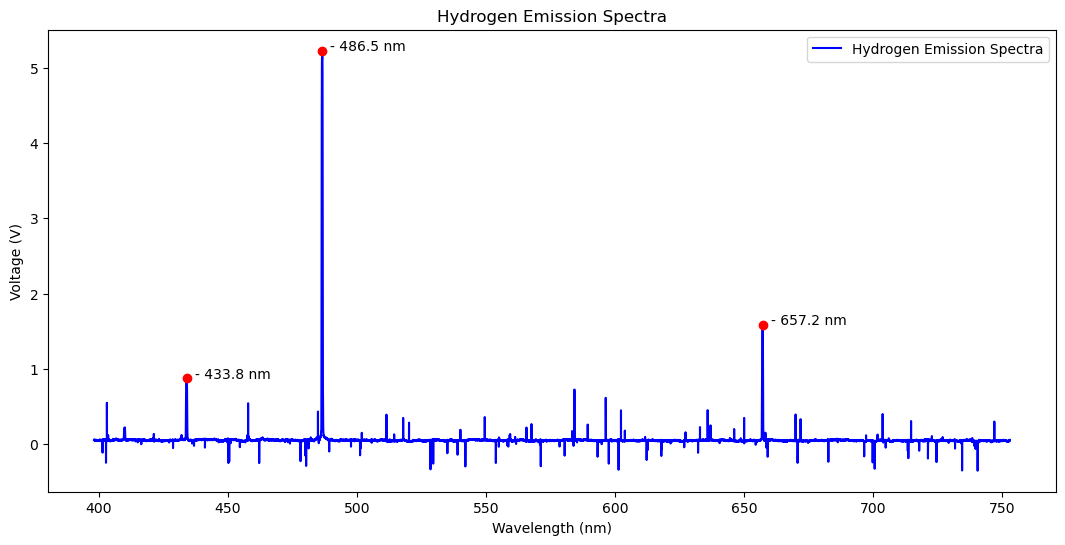

In [5]:
# Converting Time to Wavelength

# Creating a linear function to calculate wavelength values
def LinearFunc(x, m, b):
    return m*x + b

# Calculated slope and intercept
average_hydrogen_slope = (3.129e-2 + 3.104e-2) / 2  #nm/ds
hydrogen_intercept = 398.0  # nm

# Calculating Wavelength
hydrogen_wavelength = LinearFunc(hydrogen_runtime2, average_hydrogen_slope, hydrogen_intercept)

# Plotting
plt.figure(figsize=(13,6))
plt.plot(hydrogen_wavelength, hydrogen_run2, color='b', zorder=1,label='Hydrogen Emission Spectra')

# Should be 434.0 nm
plt.text(hydrogen_wavelength[1252], hydrogen_run2[1152], '- 433.8 nm')
plt.scatter(hydrogen_wavelength[1152], hydrogen_run2[1152], color='r')

# Should be 486.1 nm
plt.text(hydrogen_wavelength[2942], hydrogen_run2[2842], '- 486.5 nm')
plt.scatter(hydrogen_wavelength[2842], hydrogen_run2[2842], color='r')

# Should be 656.2 nm
plt.text(hydrogen_wavelength[8419], hydrogen_run2[8319], '- 657.2 nm')
plt.scatter(hydrogen_wavelength[8319], hydrogen_run2[8319], color='r')
plt.title("Hydrogen Emission Spectra")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

# $***************************************$

# Analyzing Helium Data:

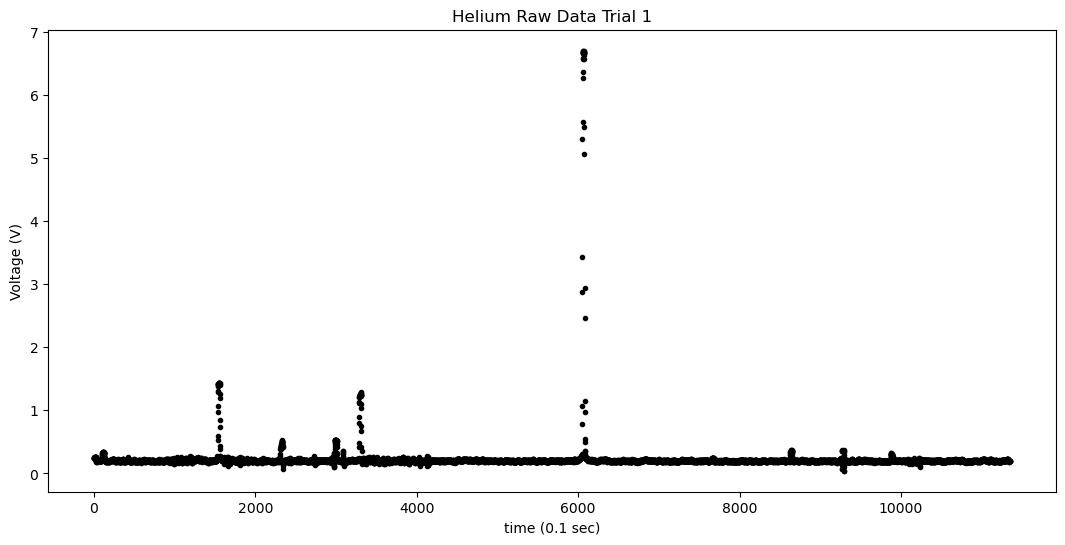

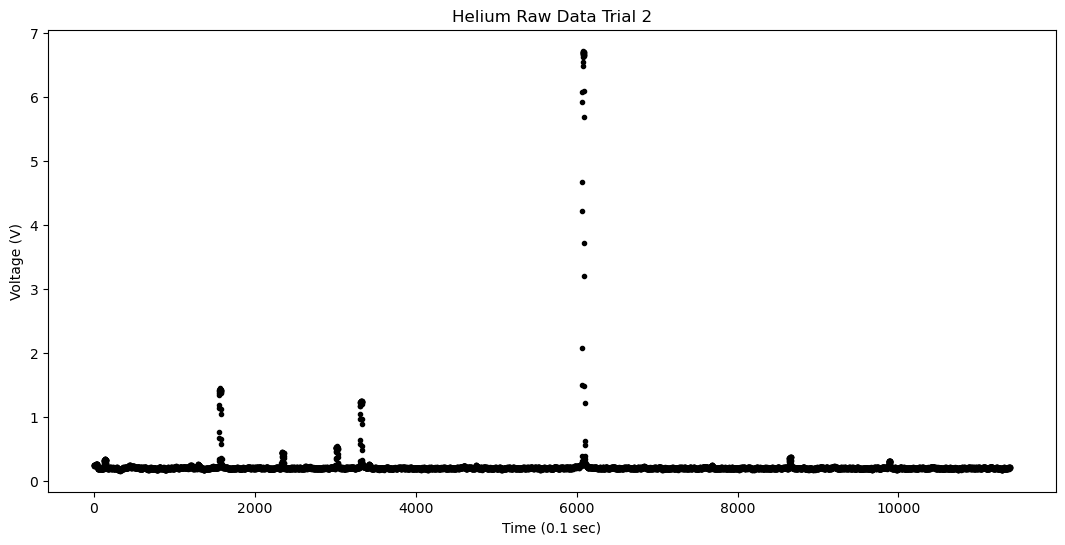

In [6]:
# Loading in trial 1
helium_run1 = np.loadtxt("He_data1", skiprows=4, usecols=1, delimiter=",", dtype="float")

# Runtime of the experiment in seconds
helium_runtime1 = np.arange(0,len(helium_run1))

# Loading in trial 2
helium_run2 = np.loadtxt("He_data2", skiprows=4, usecols=1, delimiter=",", dtype="float")

# Runtime of the experiment in seconds
helium_runtime2 = np.arange(0,len(helium_run2))


# Plotting Voltage vs. # Data Points
plt.figure(figsize=(13,6))
plt.plot(helium_runtime1, helium_run1, '.', color='k')
plt.title("Helium Raw Data Trial 1")
plt.xlabel("time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

plt.figure(figsize=(13,6))
plt.plot(helium_runtime2, helium_run2, '.', color='k')
plt.title("Helium Raw Data Trial 2")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

# $***************************************$

# Helium Trial 1:

## This box of code will create a gaussian fit for two peaks in the data and determine the time value that corresponds to each peaks.

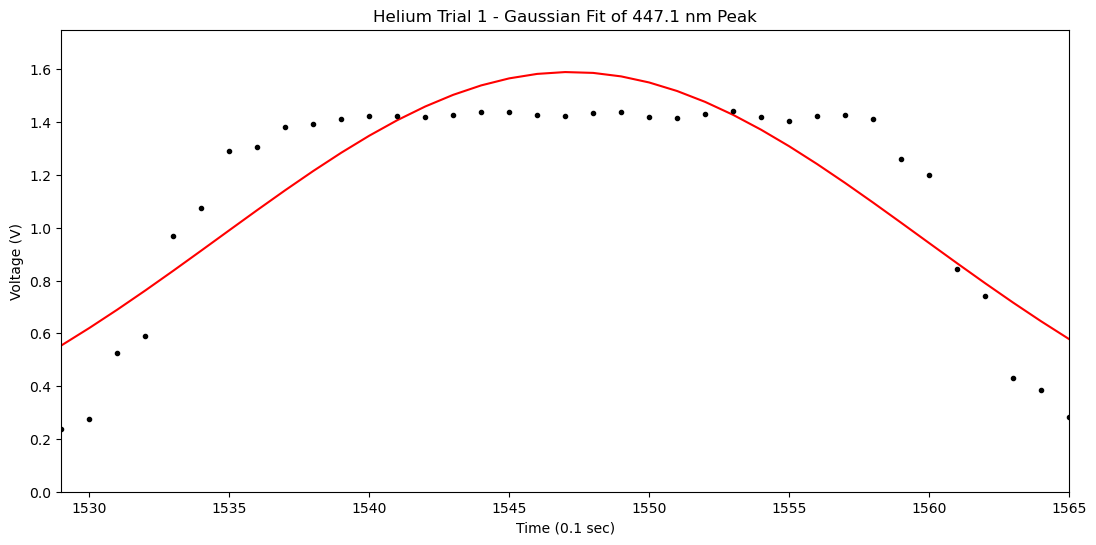

The time value corresponding to the wavelength 447.1 nm is: 1547.1 +/- 0.2 deciseconds.


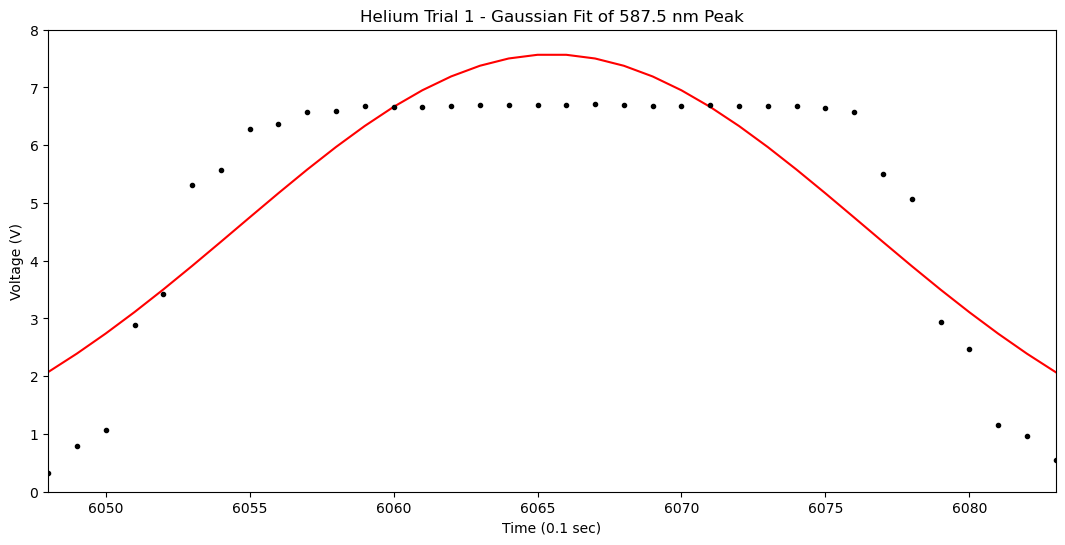

The time value corresponding to the wavelength 587.5 nm is: 6065.4 +/- 0.2 deciseconds.


In [7]:
# For the first peak:
# A peak was found between the time values 1529-1565
# These values correspond to helium's 447.1 nm peak

# Initial Values for 447.1 nm peak
helium_trial1_peak1_param0 = (300, 2000, 10)

# Fitting the 447.1 nm peak to the Gaussian
helium_trial1_paramFit1, helium_trial1_paramErr1 = optimize.curve_fit(GaussianFit,
                                                            helium_runtime1[1529:1566],
                                                            helium_run1[1529:1566],
                                                            helium_trial1_peak1_param0)

# Calculating values of the gaussian
helium_trial1_fit1 = GaussianFit(helium_runtime1[1529:1566],
                            helium_trial1_paramFit1[0],
                            helium_trial1_paramFit1[1],
                            helium_trial1_paramFit1[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([1529,1565])
plt.ylim([0,1.75])
plt.plot(helium_runtime1[1529:1566], helium_trial1_fit1, color='r')
plt.plot(helium_runtime1, helium_run1, '.', color='k')
plt.title("Helium Trial 1 - Gaussian Fit of 447.1 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 447.1 nm is:", str(helium_trial1_paramFit1[0])[:6],
      "+/-", str(helium_trial1_paramErr1[0][0])[:3], "deciseconds.")


# For the second peak:
# A peak was found between the time values 6048-6083
# These values correspond to helium's 587.5 nm peak

# Initial Values for 587.5 nm peak
helium_trial1_peak2_param0 = (100, 7000, 10)

# Fitting the  nm peak to the Gaussian
helium_trial1_paramFit2, helium_trial1_paramErr2 = optimize.curve_fit(GaussianFit,
                                                            helium_runtime1[6048:6084],
                                                            helium_run1[6048:6084],
                                                            helium_trial1_peak2_param0)

# Calculating values of the gaussian
helium_trial1_fit2 = GaussianFit(helium_runtime1[6048:6084],
                            helium_trial1_paramFit2[0],
                            helium_trial1_paramFit2[1],
                            helium_trial1_paramFit2[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([6048,6083])
plt.ylim([0,8])
plt.plot(helium_runtime1[6048:6084], helium_trial1_fit2, color='r')
plt.plot(helium_runtime1, helium_run1, '.', color='k')
plt.title("Helium Trial 1 - Gaussian Fit of 587.5 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 587.5 nm is:", str(helium_trial1_paramFit2[0])[:6],
      "+/-", str(helium_trial1_paramErr2[0][0])[:3], "deciseconds.")

## Converting Time to Wavelength:

### In order to get the x-axis from time into wavelength, the two must be related through a function. A function of wavelength as a function of time should be the linear function $\, \lambda(t) = mt\, +\, b\, $. This means that the slope of this function will give the conversion factor between time and wavelength. This slope can be calculated as follows:

## $ m = \frac{\Delta{\lambda}}{\Delta{t}} = \frac{\lambda_{2}\, -\, \lambda_{1}}{t_{2}\, -\, t_{1}} = \frac{587.5\, nm\, -\, 447.1\, nm}{6065.4\, ds\, -\, 1547.1\, ds} $
## $ m = 3.107\, x\, 10^{-2}\, \frac{nm}{ds}$

### Calculating Error in Slope:

## $ \sigma_{m} = \sqrt{(\frac{\partial{m}}{\partial{(\Delta{\lambda})}}\sigma_{\Delta{\lambda}})^{2}\, +\, (\frac{\partial{m}}{\partial{(\Delta{t})}}\sigma_{\Delta{t}})^{2}} $

## $ \sigma_{m} = \sqrt{(\frac{\sigma_{\Delta{\lambda}}}{\Delta{t}})^{2}\, +\, (-\frac{\Delta{\lambda}}{\Delta{t^{2}}}\sigma_{\Delta{t}})^{2}} $

## $\, \sigma_{\Delta{\lambda}} = 0.05\, $ and $\, \sigma_{\Delta{t}} = 0.4\, $, giving:

## $ \sigma_{m} = \sqrt{(\frac{0.05}{6065.4\, ds\, -\, 1547.1\, ds})^{2}\, +\, (-(\frac{587.5\, nm\, -\, 447.1\, nm}{({6065.4\, ds\, -\, 1547.1\, ds})^{2}})0.4)^{2}} $

## $ \sigma_{m} = 0.001\, x\, 10^{-2} $

# Helium Trial 2:

## This box of code will create a gaussian fit for two peaks in the data and determine the time value that corresponds to each peaks.

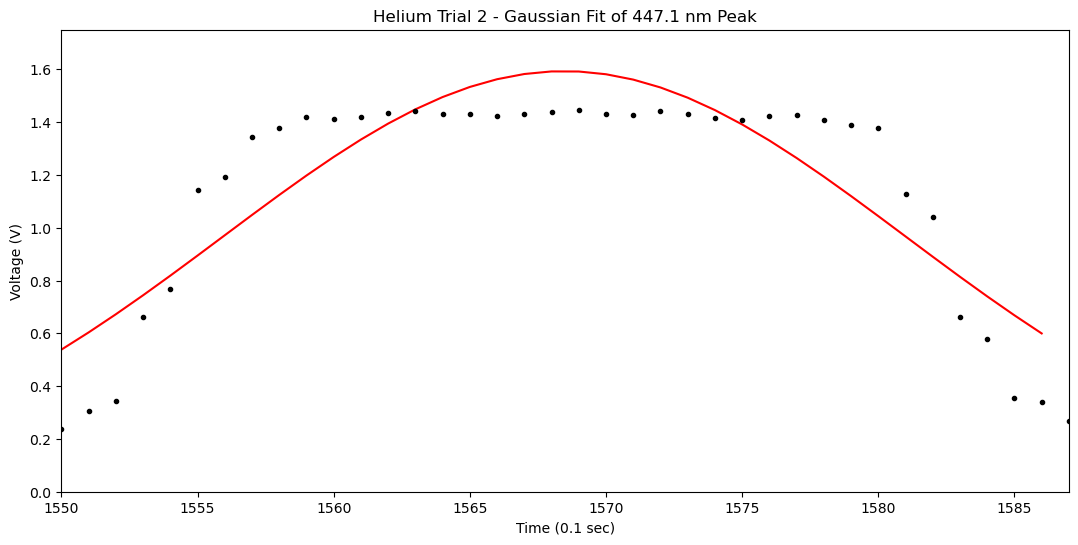

The time value corresponding to the wavelength 447.1 nm is: 1568.4 +/- 0.2 deciseconds.


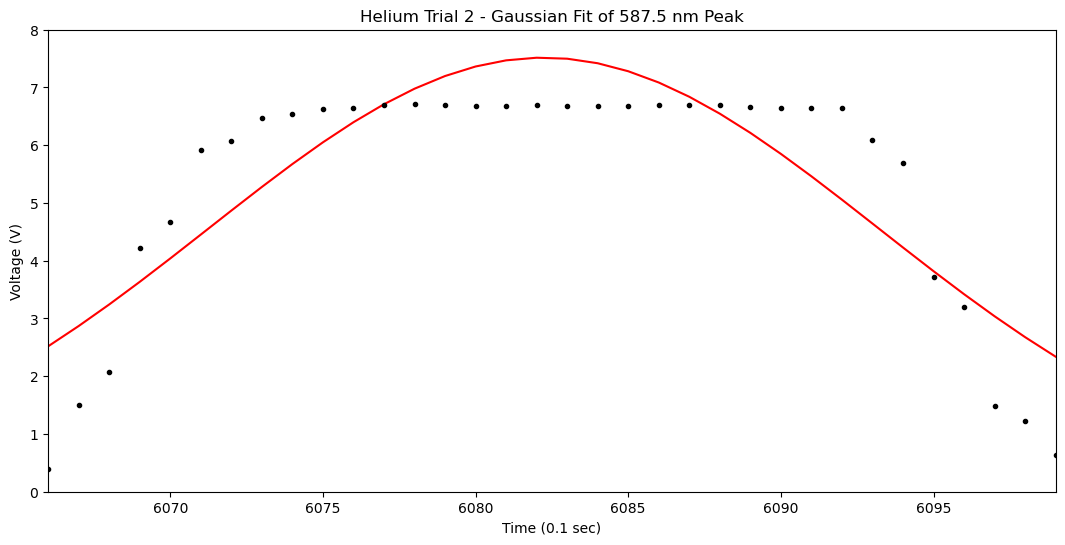

The time value corresponding to the wavelength 587.5 nm is: 6082.2 +/- 0.3 deciseconds.


In [8]:
# For the first peak:
# A peak was found between the time values 1550-1586
# These values correspond to helium's 447.1 nm peak

# Initial Values for 447.1 nm peak
helium_trial2_peak1_param0 = (300, 2000, 10)

# Fitting the 447.1 nm peak to the Gaussian
helium_trial2_paramFit1, helium_trial2_paramErr1 = optimize.curve_fit(GaussianFit,
                                                            helium_runtime2[1550:1587],
                                                            helium_run2[1550:1587],
                                                            helium_trial2_peak1_param0)

# Calculating values of the gaussian
helium_trial2_fit1 = GaussianFit(helium_runtime2[1550:1587],
                            helium_trial2_paramFit1[0],
                            helium_trial2_paramFit1[1],
                            helium_trial2_paramFit1[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([1550,1587])
plt.ylim([0,1.75])
plt.plot(helium_runtime2[1550:1587], helium_trial2_fit1, color='r')
plt.plot(helium_runtime2, helium_run2, '.', color='k')
plt.title("Helium Trial 2 - Gaussian Fit of 447.1 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 447.1 nm is:", str(helium_trial2_paramFit1[0])[:6],
      "+/-", str(helium_trial2_paramErr1[0][0])[:3], "deciseconds.")


# For the second peak:
# A peak was found between the time values 6066-6099
# These values correspond to helium's 587.5 nm peak

# Initial Values for 587.5 nm peak
helium_trial2_peak2_param0 = (100, 7000, 10)

# Fitting the  nm peak to the Gaussian
helium_trial2_paramFit2, helium_trial2_paramErr2 = optimize.curve_fit(GaussianFit,
                                                            helium_runtime2[6066:6100],
                                                            helium_run2[6066:6100],
                                                            helium_trial2_peak2_param0)

# Calculating values of the gaussian
helium_trial2_fit2 = GaussianFit(helium_runtime2[6066:6100],
                            helium_trial2_paramFit2[0],
                            helium_trial2_paramFit2[1],
                            helium_trial2_paramFit2[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([6066,6099])
plt.ylim([0,8])
plt.plot(helium_runtime2[6066:6100], helium_trial2_fit2, color='r')
plt.plot(helium_runtime2, helium_run2, '.', color='k')
plt.title("Helium Trial 2 - Gaussian Fit of 587.5 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 587.5 nm is:", str(helium_trial2_paramFit2[0])[:6],
      "+/-", str(helium_trial2_paramErr2[0][0])[:3], "deciseconds.")

## Converting Time to Wavelength:

### In order to get the x-axis from time into wavelength, the two must be related through a function. A function of wavelength as a function of time should be the linear function $\, \lambda(t) = mt\, +\, b\, $. This means that the slope of this function will give the conversion factor between time and wavelength. This slope can be calculated as follows:

## $ m = \frac{\Delta{\lambda}}{\Delta{t}} = \frac{\lambda_{2}\, -\, \lambda_{1}}{t_{2}\, -\, t_{1}} = \frac{587.5\, nm\, -\, 447.1\, nm}{6082.2\, ds\, -\, 1568.4\, ds} $
## $ m = 3.110\, x\, 10^{-2}\, \frac{nm}{ds}$

### Calculating Error in Slope:

## $ \sigma_{m} = \sqrt{(\frac{\partial{m}}{\partial{(\Delta{\lambda})}}\sigma_{\Delta{\lambda}})^{2}\, +\, (\frac{\partial{m}}{\partial{(\Delta{t})}}\sigma_{\Delta{t}})^{2}} $

## $ \sigma_{m} = \sqrt{(\frac{\sigma_{\Delta{\lambda}}}{\Delta{t}})^{2}\, +\, (-\frac{\Delta{\lambda}}{\Delta{t^{2}}}\sigma_{\Delta{t}})^{2}} $

## $\, \sigma_{\Delta{\lambda}} = 0.05\, $ and $\, \sigma_{\Delta{t}} = 0.5\, $, giving:

## $ \sigma_{m} = \sqrt{(\frac{0.05}{6082.2\, ds\, -\, 1568.4\, ds})^{2}\, +\, (-(\frac{587.5\, nm\, -\, 447.1\, nm}{({6082.2\, ds\, -\, 1568.4\, ds})^{2}})0.5)^{2}} $

## $ \sigma_{m} = 0.001\, x\, 10^{-2} $

### In order for time to be properly converted to wavelength, the wavelength must be shifted by a certain number due to the data collection starting around 400 nm. In terms of the linear equation, this is the y-intercept. Using the data from the second trial, the y-intercept will be calculated.

### The y-intercept was calculated as follows for the 587.5 nm peak:

### $ b = (587.5\, nm)\, -\, (3.110\, x\, 10^{-2})(6082.2\, ds) $

### $ b = 398.3\, nm $

## $ \sigma_{b} = \sqrt{(\frac{\partial{b}}{\partial{(t)}}\sigma_{\Delta{t}})^{2}\, +\, (\frac{\partial{b}}{\partial{(m)}}\sigma_{m})^{2}}\, +\, \sigma_{\lambda} $

## $ \sigma_{b} = \sqrt{(m\sigma_{t})^{2}\, +\, (t\sigma_{m})^{2}}\, +\, \sigma_{\lambda} $

## $ \sigma_{b} = \sqrt{(3.110\, x\, 10^{-2}\, \frac{nm}{ds}*0.3)^{2}\, +\, (6082.2\, ds*0.001\, x\, 10^{-2})^{2}}\, +\, 0.05 $

## $ \sigma_{b} = 0.1 $

## The average slope from both trials is calculated and the error is as follows:

## $ m_{avg} = 3.108\, x\, 10^{-2}\, \frac{nm}{ds} $

## $ \sigma_{m_{avg}} = \sqrt{(m_{1}\, -\, m_{avg})^{2}\, +\, (m_{2}\, -\, m_{avg})^{2}} $

## $ \sigma_{m_{avg}} = \sqrt{(3.107\, x\, 10^{-2}\, \frac{nm}{ds}\, -\, 3.108\, x\, 10^{-2}\, \frac{nm}{ds})^{2}\, +\, (3.110\, x\, 10^{-2}\, \frac{nm}{ds} -\, 3.108\, x\, 10^{-2}\, \frac{nm}{ds})^{2}} $

## $ \sigma_{m_{avg}} = 0.002\, x\, 10^{-2} $

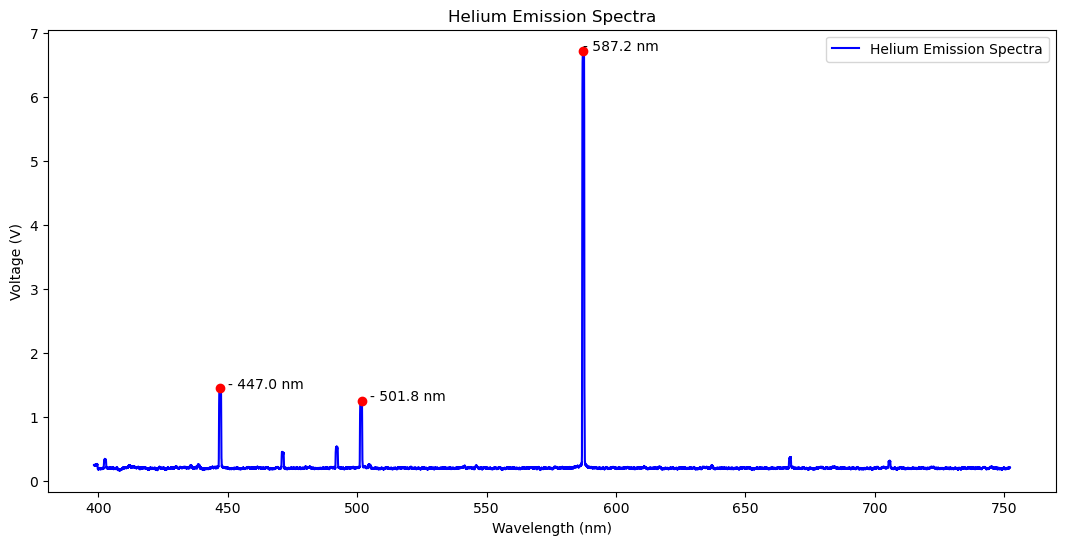

In [9]:
# Calculated slope and intercept
average_helium_slope = (3.107e-2 + 3.110e-2) / 2  #nm/ds
average_helium_intercept = 398.3  # nm

# Calculating Wavelength
helium_wavelength = LinearFunc(helium_runtime2, average_helium_slope, average_helium_intercept)

# Plotting
plt.figure(figsize=(13,6))
plt.plot(helium_wavelength, helium_run2, color='b', zorder=1,label='Helium Emission Spectra')

# Should be 447.0 nm
plt.text(helium_wavelength[1669], helium_run2[1569], '- 447.0 nm')
plt.scatter(helium_wavelength[1569], helium_run2[1569], color='r')

# Should be 501.5 nm
plt.text(helium_wavelength[3430], helium_run2[3330], '- 501.8 nm')
plt.scatter(helium_wavelength[3330], helium_run2[3330], color='r')

# Should be 587.5 nm
plt.text(helium_wavelength[6078], helium_run2[6078], '- 587.2 nm')
plt.scatter(helium_wavelength[6078], helium_run2[6078], color='r')
plt.title("Helium Emission Spectra")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()


# $***************************************$

# Analyzing Neon Data:

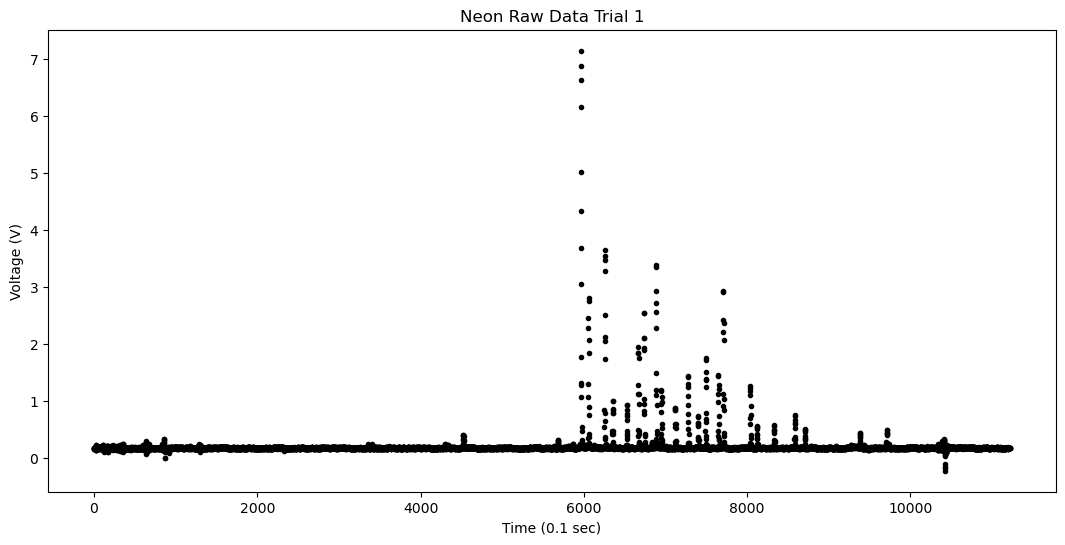

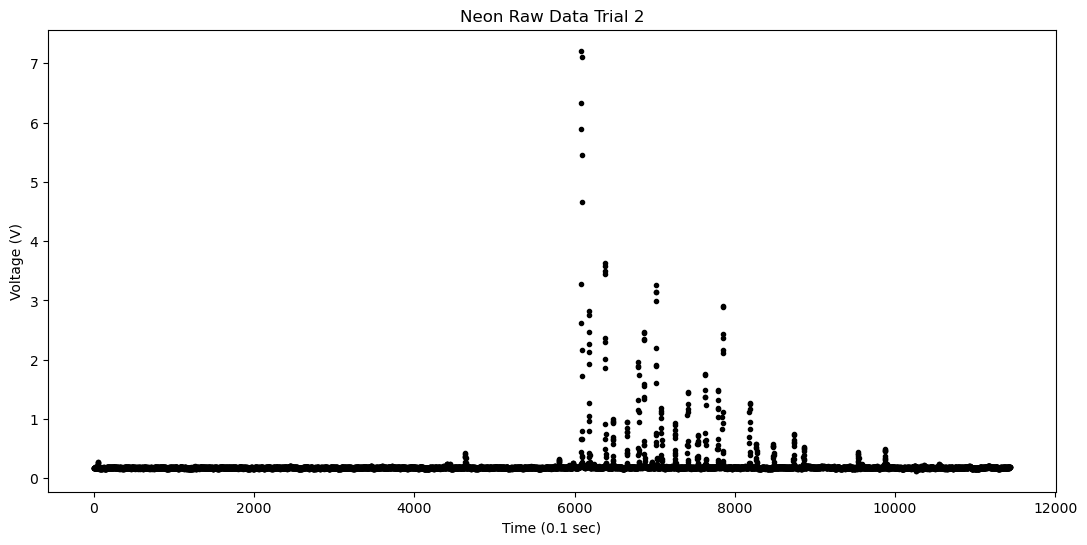

In [10]:
# Loading in trial 1
neon_run1 = np.loadtxt("Ne_data1", skiprows=4, usecols=1, delimiter=",", dtype="float")

# Runtime of the experiment in seconds
neon_runtime1 = np.arange(0,len(neon_run1))

# Loading in trial 2
neon_run2 = np.loadtxt("Ne_data2", skiprows=4, usecols=1, delimiter=",", dtype="float")

# Runtime of the experiment in seconds
neon_runtime2 = np.arange(0,len(neon_run2))

# Plotting Voltage vs. # Data Points
plt.figure(figsize=(13,6))
plt.plot(neon_runtime1, neon_run1, '.', color='k')
plt.title("Neon Raw Data Trial 1")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

plt.figure(figsize=(13,6))
plt.plot(neon_runtime2, neon_run2, '.', color='k')
plt.title("Neon Raw Data Trial 2")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

# Neon Trial 1:

## This box of code will create a gaussian fit for two peaks in the data and determine the time value that corresponds to each peaks.

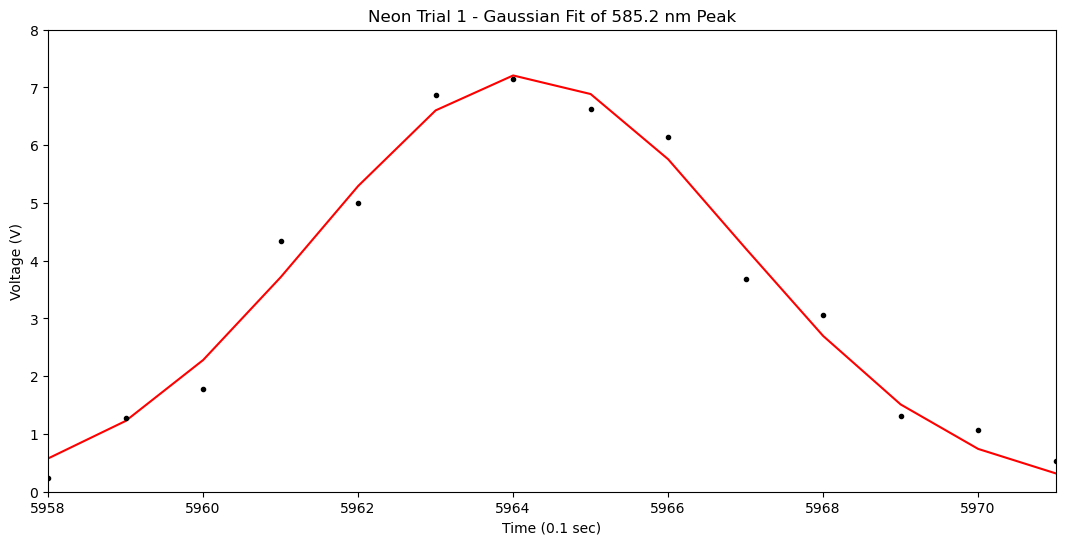

The time value corresponding to the wavelength 585.2 nm is: 5964.157 +/- 0.009 deciseconds.


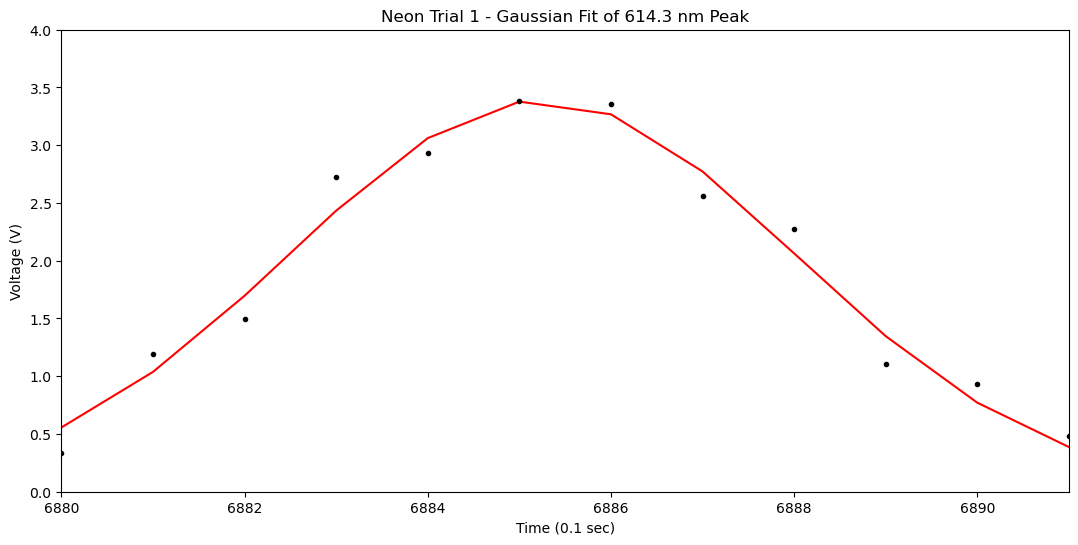

The time value corresponding to the wavelength 614.3 nm is: 6885.24 +/- 0.01 deciseconds.


In [11]:
# For the first peak:
# A peak was found between the time values 5958-5971
# These values correspond to neon's 585.2 nm peak

# Initial Values for 585.2 nm peak
neon_trial1_peak1_param0 = (300, 2000, 10)

# Fitting the 585.2 nm peak to the Gaussian
neon_trial1_paramFit1, neon_trial1_paramErr1 = optimize.curve_fit(GaussianFit,
                                                            neon_runtime1[5958:5972],
                                                            neon_run1[5958:5972],
                                                            neon_trial1_peak1_param0)

# Calculating values of the gaussian
neon_trial1_fit1 = GaussianFit(neon_runtime1[5958:5972],
                            neon_trial1_paramFit1[0],
                            neon_trial1_paramFit1[1],
                            neon_trial1_paramFit1[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([5958,5971])
plt.ylim([0,8])
plt.plot(neon_runtime1[5958:5972], neon_trial1_fit1, color='r')
plt.plot(neon_runtime1, neon_run1, '.', color='k')
plt.title("Neon Trial 1 - Gaussian Fit of 585.2 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 585.2 nm is:", str(neon_trial1_paramFit1[0])[:8],
      "+/-", str(neon_trial1_paramErr1[0][0])[:5], "deciseconds.")


# For the second peak:
# A peak was found between the time values 6880-6892
# These values correspond to neon's 614.3 nm peak

# Initial Values for 614.3 nm peak
neon_trial1_peak2_param0 = (100, 7000, 10)

# Fitting the  nm peak to the Gaussian
neon_trial1_paramFit2, neon_trial1_paramErr2 = optimize.curve_fit(GaussianFit,
                                                            neon_runtime1[6880:6892],
                                                            neon_run1[6880:6892],
                                                            neon_trial1_peak2_param0)

# Calculating values of the gaussian
neon_trial1_fit2 = GaussianFit(neon_runtime1[6880:6892],
                            neon_trial1_paramFit2[0],
                            neon_trial1_paramFit2[1],
                            neon_trial1_paramFit2[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([6880,6891])
plt.ylim([0,4])
plt.plot(neon_runtime1[6880:6892], neon_trial1_fit2, color='r')
plt.plot(neon_runtime1, neon_run1, '.', color='k')
plt.title("Neon Trial 1 - Gaussian Fit of 614.3 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 614.3 nm is:", str(neon_trial1_paramFit2[0])[:7],
      "+/-", str(neon_trial1_paramErr2[0][0])[:4], "deciseconds.")

## Converting Time to Wavelength:

### In order to get the x-axis from time into wavelength, the two must be related through a function. A function of wavelength as a function of time should be the linear function $\, \lambda(t) = mt\, +\, b\, $. This means that the slope of this function will give the conversion factor between time and wavelength. This slope can be calculated as follows:

## $ m = \frac{\Delta{\lambda}}{\Delta{t}} = \frac{\lambda_{2}\, -\, \lambda_{1}}{t_{2}\, -\, t_{1}} = \frac{614.3\, nm\, -\, 585.2\, nm}{6885.24\, ds\, -\, 5964.157\, ds} $
## $ m = 3.159\, x\, 10^{-2}\, \frac{nm}{ds}$

### Calculating Error in Slope:

## $ \sigma_{m} = \sqrt{(\frac{\partial{m}}{\partial{(\Delta{\lambda})}}\sigma_{\Delta{\lambda}})^{2}\, +\, (\frac{\partial{m}}{\partial{(\Delta{t})}}\sigma_{\Delta{t}})^{2}} $

## $ \sigma_{m} = \sqrt{(\frac{\sigma_{\Delta{\lambda}}}{\Delta{t}})^{2}\, +\, (-\frac{\Delta{\lambda}}{\Delta{t^{2}}}\sigma_{\Delta{t}})^{2}} $

## $\, \sigma_{\Delta{\lambda}} = 0.05\, $ and $\, \sigma_{\Delta{t}} = \, 0.02 $, giving:

## $ \sigma_{m} = \sqrt{(\frac{0.05}{6885.24\, ds\, -\, 5964.157\, ds})^{2}\, +\, (-(\frac{614.3\, nm\, -\, 585.2\, nm}{({6885.24\, ds\, -\, 5964.157\, ds})^{2}})0.02)^{2}} $

## $ \sigma_{m} = 0.005\, x\, 10^{-2} $

# Neon Trial 2:

## This box of code will create a gaussian fit for two peaks in the data and determine the time value that corresponds to each peaks.

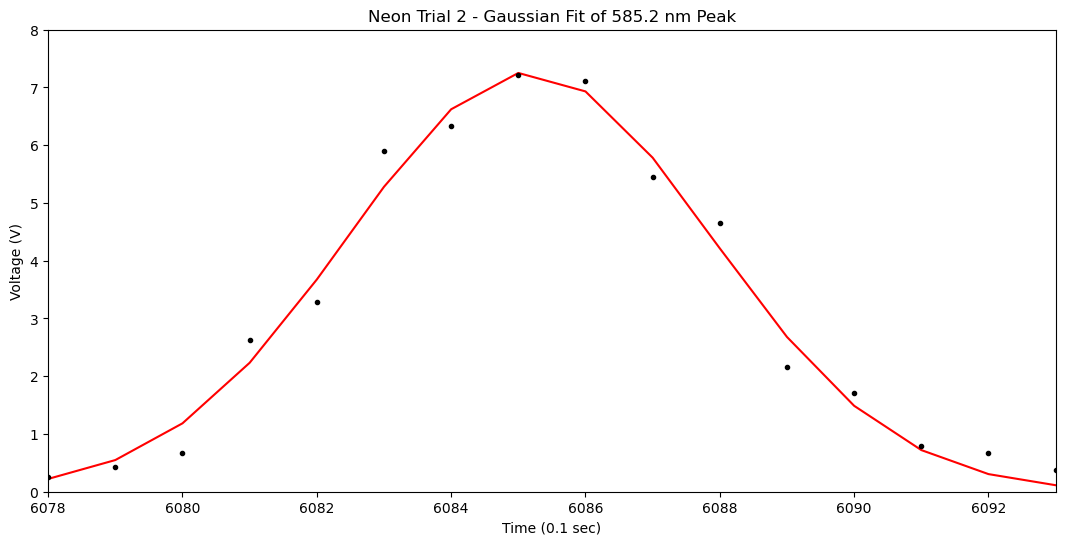

The time value corresponding to the wavelength 585.2 nm is: 6085.167 +/- 0.008 deciseconds.


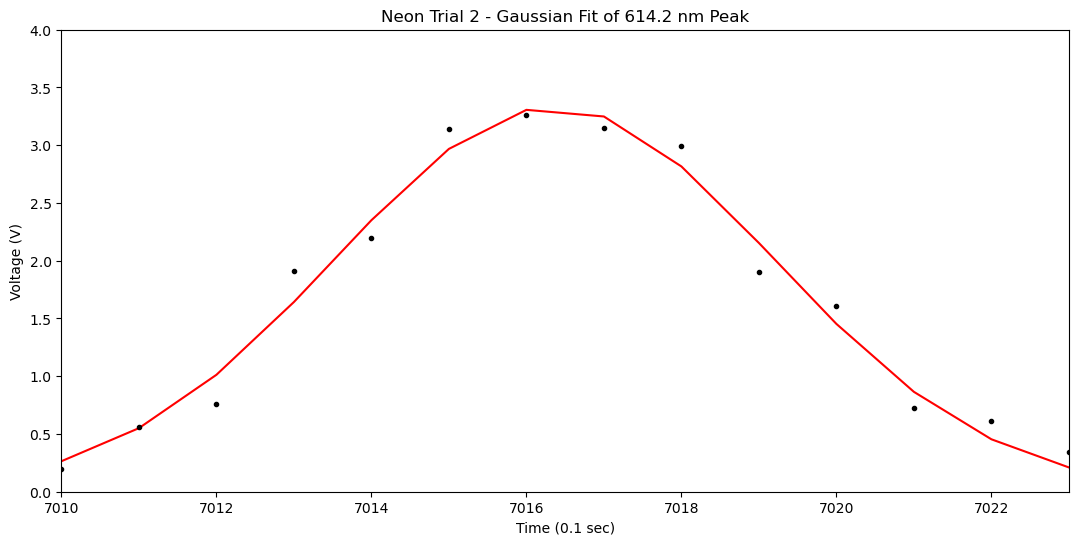

The time value corresponding to the wavelength 614.2 nm is: 7016.36 +/- 0.01 deciseconds.


In [12]:
# For the first peak:
# A peak was found between the time values 6078-6093
# These values correspond to neon's 585.2 nm peak

# Initial Values for 585.2 nm peak
neon_trial2_peak1_param0 = (300, 2000, 10)

# Fitting the 585.2 nm peak to the Gaussian
neon_trial2_paramFit1, neon_trial2_paramErr1 = optimize.curve_fit(GaussianFit,
                                                            neon_runtime2[6078:6094],
                                                            neon_run2[6078:6094],
                                                            neon_trial2_peak1_param0)

# Calculating values of the gaussian
neon_trial2_fit1 = GaussianFit(neon_runtime2[6078:6094],
                            neon_trial2_paramFit1[0],
                            neon_trial2_paramFit1[1],
                            neon_trial2_paramFit1[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([6078,6093])
plt.ylim([0,8])
plt.plot(neon_runtime2[6078:6094], neon_trial2_fit1, color='r')
plt.plot(neon_runtime2, neon_run2, '.', color='k')
plt.title("Neon Trial 2 - Gaussian Fit of 585.2 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 585.2 nm is:", str(neon_trial2_paramFit1[0])[:8],
      "+/-", str(neon_trial2_paramErr1[0][0])[:5], "deciseconds.")


# For the second peak:
# A peak was found between the time values 7010-7023
# These values correspond to neon's 614.2 nm peak

# Initial Values for 614.2 nm peak
neon_trial2_peak2_param0 = (100, 7000, 10)

# Fitting the  nm peak to the Gaussian
neon_trial2_paramFit2, neon_trial2_paramErr2 = optimize.curve_fit(GaussianFit,
                                                            neon_runtime2[7010:7024],
                                                            neon_run2[7010:7024],
                                                            neon_trial2_peak2_param0)

# Calculating values of the gaussian
neon_trial2_fit2 = GaussianFit(neon_runtime2[7010:7024],
                            neon_trial2_paramFit2[0],
                            neon_trial2_paramFit2[1],
                            neon_trial2_paramFit2[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([7010,7023])
plt.ylim([0,4])
plt.plot(neon_runtime2[7010:7024], neon_trial2_fit2, color='r')
plt.plot(neon_runtime2, neon_run2, '.', color='k')
plt.title("Neon Trial 2 - Gaussian Fit of 614.2 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 614.2 nm is:", str(neon_trial2_paramFit2[0])[:7],
      "+/-", str(neon_trial2_paramErr2[0][0])[:4], "deciseconds.")

## Converting Time to Wavelength:

### In order to get the x-axis from time into wavelength, the two must be related through a function. A function of wavelength as a function of time should be the linear function $\, \lambda(t) = mt\, +\, b\, $. This means that the slope of this function will give the conversion factor between time and wavelength. This slope can be calculated as follows:

## $ m = \frac{\Delta{\lambda}}{\Delta{t}} = \frac{\lambda_{2}\, -\, \lambda_{1}}{t_{2}\, -\, t_{1}} = \frac{614.2\, nm\, -\, 585.2\, nm}{7016.36\, ds\, -\, 6085.167\, ds} $
## $ m = 3.125\, x\, 10^{-2}\, \frac{nm}{ds}$

### Calculating Error in Slope:

## $ \sigma_{m} = \sqrt{(\frac{\partial{m}}{\partial{(\Delta{\lambda})}}\sigma_{\Delta{\lambda}})^{2}\, +\, (\frac{\partial{m}}{\partial{(\Delta{t})}}\sigma_{\Delta{t}})^{2}} $

## $ \sigma_{m} = \sqrt{(\frac{\sigma_{\Delta{\lambda}}}{\Delta{t}})^{2}\, +\, (-\frac{\Delta{\lambda}}{\Delta{t^{2}}}\sigma_{\Delta{t}})^{2}} $

## $\, \sigma_{\Delta{\lambda}} = 0.05\, $ and $\, \sigma_{\Delta{t}} = 0.02 \, $, giving:

## $ \sigma_{m} = \sqrt{(\frac{0.05}{7016.36\, ds\, -\, 6085.167\, ds})^{2}\, +\, (-(\frac{614.2\, nm\, -\, 585.2\, nm}{({7016.36\, ds\, -\, 6085.167\, ds})^{2}})0.02)^{2}} $

## $ \sigma_{m} = 0.005\, x\, 10^{-2} $



### In order for time to be properly converted to wavelength, the wavelength must be shifted by a certain number due to the data collection starting around 400 nm. In terms of the linear equation, this is the y-intercept. Using the data from the second trial, the y-intercept will be calculated.

### The y-intercept was calculated as follows for the 614.2 nm peak:

### $ b = (614.2\, nm)\, -\, (3.125\, x\, 10^{-2})(7016.36\, ds) $

### $ b = 394.9\, nm $

## $ \sigma_{b} = \sqrt{(\frac{\partial{b}}{\partial{(t)}}\sigma_{\Delta{t}})^{2}\, +\, (\frac{\partial{b}}{\partial{(m)}}\sigma_{m})^{2}}\, +\, \sigma_{\lambda} $

## $ \sigma_{b} = \sqrt{(m\sigma_{t})^{2}\, +\, (t\sigma_{m})^{2}}\, +\, \sigma_{\lambda} $

## $ \sigma_{b} = \sqrt{(3.125\, x\, 10^{-2}\, \frac{nm}{ds}*0.01)^{2}\, +\, (7016.36\, ds*0.005\, x\, 10^{-2})^{2}}\, +\, 0.05 $

## $ \sigma_{b} = 0.4 $

## The average slope from both trials is calculated and the error is as follows:

## $ m_{avg} = 3.142\, x\, 10^{-2}\, \frac{nm}{ds} $

## $ \sigma_{m_{avg}} = \sqrt{(m_{1}\, -\, m_{avg})^{2}\, +\, (m_{2}\, -\, m_{avg})^{2}} $

## $ \sigma_{m_{avg}} = \sqrt{(3.159\, x\, 10^{-2}\, \frac{nm}{ds}\, -\, 3.142\, x\, 10^{-2}\, \frac{nm}{ds})^{2}\, +\, (3.125\, x\, 10^{-2}\, \frac{nm}{ds} -\, 3.142\, x\, 10^{-2}\, \frac{nm}{ds})^{2}} $

## $ \sigma_{m_{avg}} = 0.024\, x\, 10^{-2} $

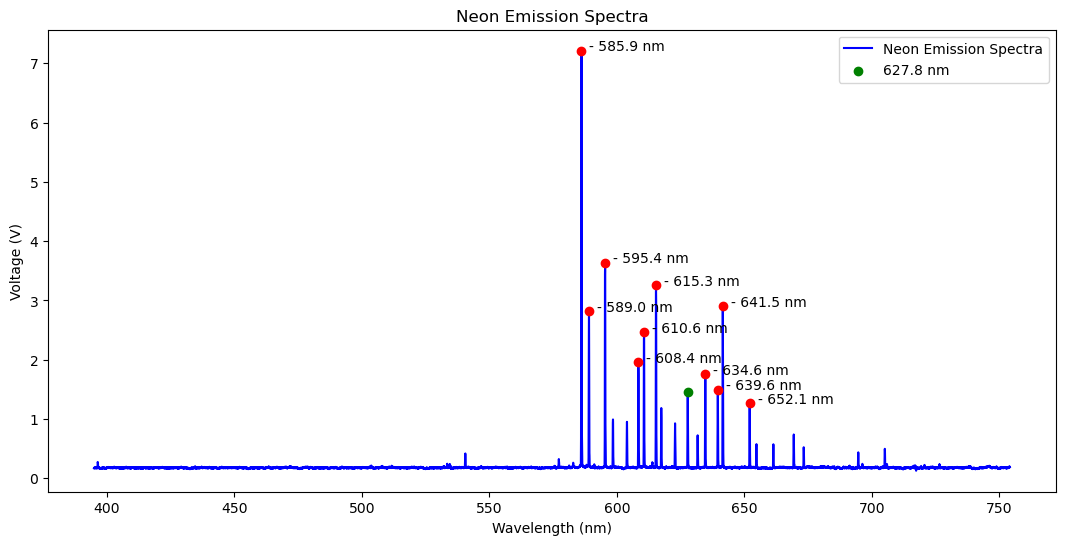

In [13]:
# Calculated slope and intercept
average_neon_slope = (3.159e-2 + 3.125e-2) / 2  #nm/ds
neon_intercept = 394.9  # nm

# Calculating Wavelength
neon_wavelength = LinearFunc(neon_runtime2, average_neon_slope, neon_intercept)

# Plotting
plt.figure(figsize=(13,6))
plt.plot(neon_wavelength, neon_run2, color='b', zorder=1,label='Neon Emission Spectra')

# Should be 585.2 nm
plt.text(neon_wavelength[6185], neon_run2[6085], '- 585.9 nm')
plt.scatter(neon_wavelength[6085], neon_run2[6085], color='r')

# Should be 588.1 nm
plt.text(neon_wavelength[6279], neon_run2[6179], '- 589.0 nm')
plt.scatter(neon_wavelength[6179], neon_run2[6179], color='r')

# Should be 594.4 nm
plt.text(neon_wavelength[6481], neon_run2[6381], '- 595.4 nm')
plt.scatter(neon_wavelength[6381], neon_run2[6381], color='r')

# Should be 607.4 nm
plt.text(neon_wavelength[6896], neon_run2[6796], '- 608.4 nm')
plt.scatter(neon_wavelength[6796], neon_run2[6796], color='r')

# Should be 609.6 nm
plt.text(neon_wavelength[6966], neon_run2[6866], '- 610.6 nm')
plt.scatter(neon_wavelength[6866], neon_run2[6866], color='r')

# Should be 614.3 nm
plt.text(neon_wavelength[7116], neon_run2[7016], '- 615.3 nm')
plt.scatter(neon_wavelength[7016], neon_run2[7016], color='r')

# Should be 626.6 nm
plt.scatter(neon_wavelength[7412], neon_run2[7412], color='g', label='627.8 nm')

# Should be 633.4 nm
plt.text(neon_wavelength[7731], neon_run2[7631], '- 634.6 nm')
plt.scatter(neon_wavelength[7631], neon_run2[7631], color='r')

# Should be 638.2 nm
plt.text(neon_wavelength[7887], neon_run2[7787], '- 639.6 nm')
plt.scatter(neon_wavelength[7787], neon_run2[7787], color='r')

# Should be 640.2 nm
plt.text(neon_wavelength[7950], neon_run2[7850], '- 641.5 nm')
plt.scatter(neon_wavelength[7850], neon_run2[7850], color='r')

# Should be 650.6 nm
plt.text(neon_wavelength[8285], neon_run2[8185], '- 652.1 nm')
plt.scatter(neon_wavelength[8185], neon_run2[8185], color='r')

plt.title("Neon Emission Spectra")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

# $***************************************$

# Analyzing Argon Data:

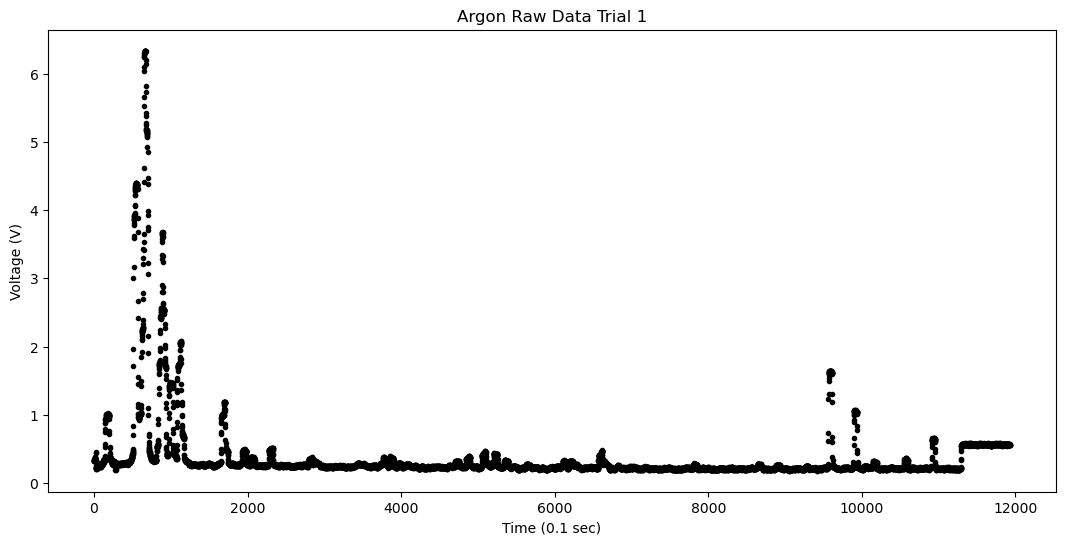

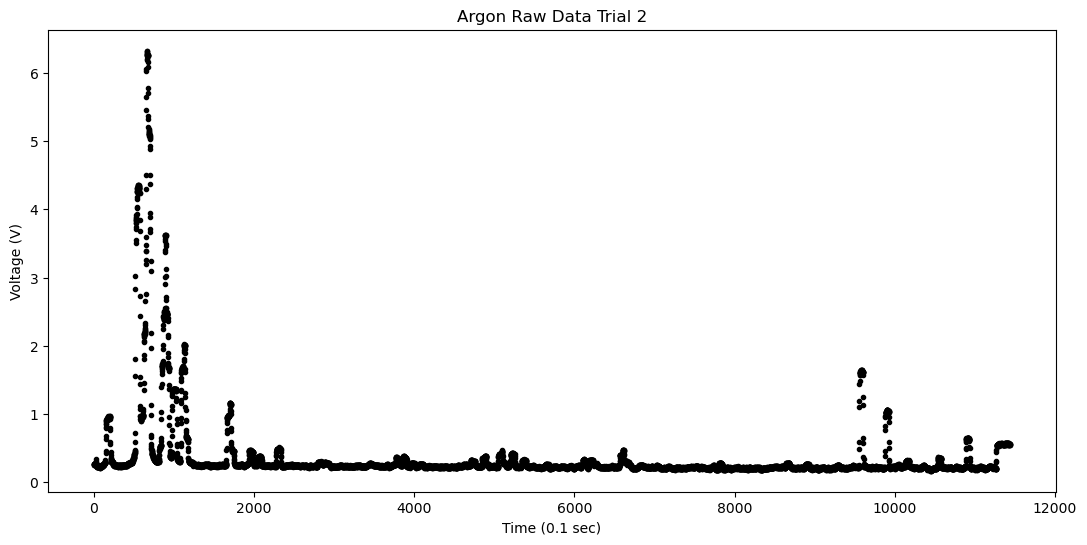

In [14]:
# Loading in trial 1
argon_run1 = np.loadtxt("Ar_data1", skiprows=4, usecols=1, delimiter=",", dtype="float")

# Runtime of the experiment in seconds
argon_runtime1 = np.arange(0,len(argon_run1))

# Loading in trial 2
argon_run2 = np.loadtxt("Ar_data2", skiprows=4, usecols=1, delimiter=",", dtype="float")

# Runtime of the experiment in seconds
argon_runtime2 = np.arange(0,len(argon_run2))

# Plotting Voltage vs. # Data Points
plt.figure(figsize=(13,6))
plt.plot(argon_runtime1, argon_run1, '.', color='k')
plt.title("Argon Raw Data Trial 1")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

plt.figure(figsize=(13,6))
plt.plot(argon_runtime2, argon_run2, '.', color='k')
plt.title("Argon Raw Data Trial 2")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

# Argon Trial 1:

## This box of code will create a gaussian fit for two peaks in the data and determine the time value that corresponds to each peaks.

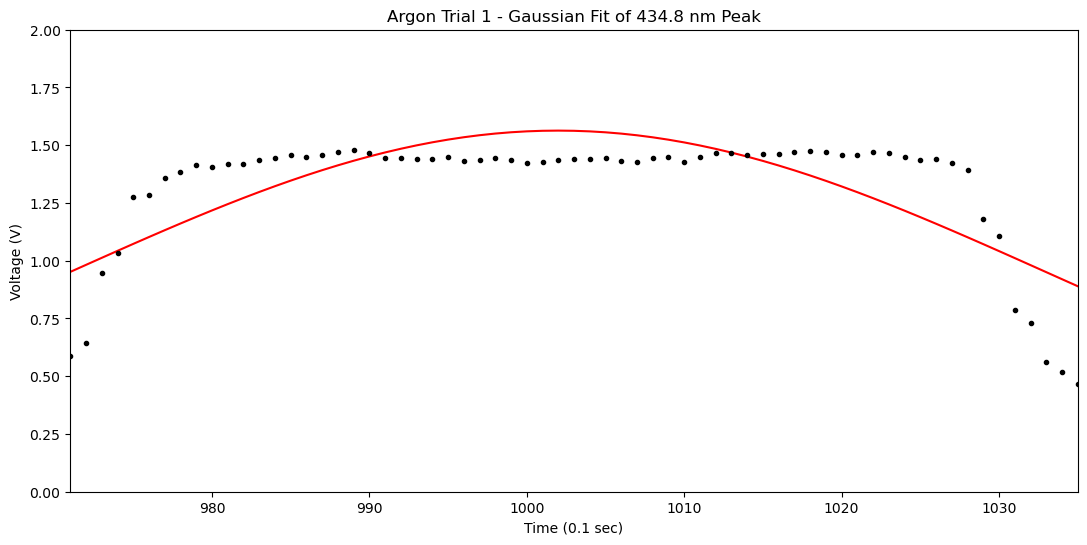

The time value corresponding to the wavelength 434.8 nm is: 1001 +/- 1 deciseconds.


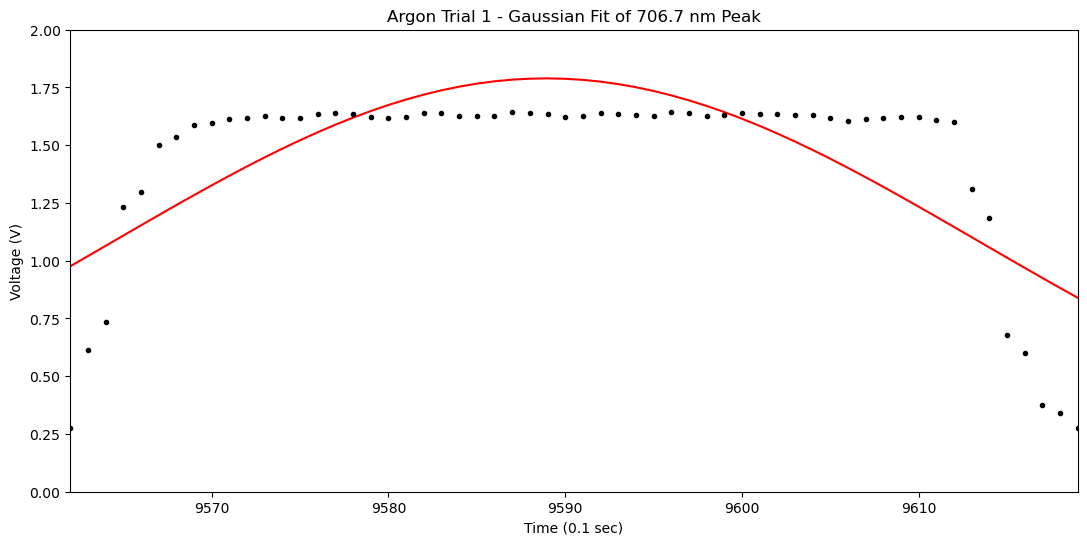

The time value corresponding to the wavelength 706.7 nm is: 9588 +/- 1 deciseconds.


In [15]:
# For the first peak:
# A peak was found between the time values 970-1035
# These values correspond to argon's 434.8 nm peak

# Initial Values for 434.8 nm peak
argon_trial1_peak1_param0 = (300, 2000, 10)

# Fitting the 434.8 m peak to the Gaussian
argon_trial1_paramFit1, argon_trial1_paramErr1 = optimize.curve_fit(GaussianFit,
                                                            argon_runtime1[970:1036],
                                                            argon_run1[970:1036],
                                                            argon_trial1_peak1_param0)

# Calculating values of the gaussian
argon_trial1_fit1 = GaussianFit(argon_runtime1[970:1036],
                            argon_trial1_paramFit1[0],
                            argon_trial1_paramFit1[1],
                            argon_trial1_paramFit1[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([971,1035])
plt.ylim([0,2])
plt.plot(argon_runtime1[970:1036], argon_trial1_fit1, color='r')
plt.plot(argon_runtime1, argon_run1, '.', color='k')
plt.title("Argon Trial 1 - Gaussian Fit of 434.8 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 434.8 nm is:", str(argon_trial1_paramFit1[0])[:4],
      "+/-", str(argon_trial1_paramErr1[0][0])[:1], "deciseconds.")


# For the second peak:
# A peak was found between the time values 9562-9619
# These values correspond to argon's 706.7 nm peak

# Initial Values for 706.7 nm peak
argon_trial1_peak2_param0 = (100, 11000, 10)

# Fitting the 706.7 nm peak to the Gaussian
argon_trial1_paramFit2, argon_trial1_paramErr2 = optimize.curve_fit(GaussianFit,
                                                            argon_runtime1[9562:9620],
                                                            argon_run1[9562:9620],
                                                            argon_trial1_peak2_param0)

# Calculating values of the gaussian
argon_trial1_fit2 = GaussianFit(argon_runtime1[9562:9620],
                            argon_trial1_paramFit2[0],
                            argon_trial1_paramFit2[1],
                            argon_trial1_paramFit2[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([9562,9619])
plt.ylim([0,2])
plt.plot(argon_runtime1[9562:9620], argon_trial1_fit2, color='r')
plt.plot(argon_runtime1, argon_run1, '.', color='k')
plt.title("Argon Trial 1 - Gaussian Fit of 706.7 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 706.7 nm is:", str(argon_trial1_paramFit2[0])[:4],
      "+/-", str(argon_trial1_paramErr2[0][0])[:1], "deciseconds.")

## Converting Time to Wavelength:

### In order to get the x-axis from time into wavelength, the two must be related through a function. A function of wavelength as a function of time should be the linear function $\, \lambda(t) = mt\, +\, b\, $. This means that the slope of this function will give the conversion factor between time and wavelength. This slope can be calculated as follows:

## $ m = \frac{\Delta{\lambda}}{\Delta{t}} = \frac{\lambda_{2}\, -\, \lambda_{1}}{t_{2}\, -\, t_{1}} = \frac{706.7\, nm\, -\, 434.8\, nm}{9588\, ds\, -\, 1001\, ds} $
## $ m = 3.166\, x\, 10^{-2}\, \frac{nm}{ds}$

### Calculating Error in Slope:

## $ \sigma_{m} = \sqrt{(\frac{\partial{m}}{\partial{(\Delta{\lambda})}}\sigma_{\Delta{\lambda}})^{2}\, +\, (\frac{\partial{m}}{\partial{(\Delta{t})}}\sigma_{\Delta{t}})^{2}} $

## $ \sigma_{m} = \sqrt{(\frac{\sigma_{\Delta{\lambda}}}{\Delta{t}})^{2}\, +\, (-\frac{\Delta{\lambda}}{\Delta{t^{2}}}\sigma_{\Delta{t}})^{2}} $

## $\, \sigma_{\Delta{\lambda}} = 0.05\, $ and $\, \sigma_{\Delta{t}} = 2 \, $, giving:

## $ \sigma_{m} = \sqrt{(\frac{0.05}{9588\, ds\, -\, 1001\, ds})^{2}\, +\, (-(\frac{706.7\, nm\, -\, 434.8\, nm}{({9588\, ds\, -\, 1001\, ds})^{2}})2)^{2}} $

## $ \sigma_{m} = 0.001\, x\, 10^{-2} $



# Argon Trial 2:

## This box of code will create a gaussian fit for two peaks in the data and determine the time value that corresponds to each peaks.

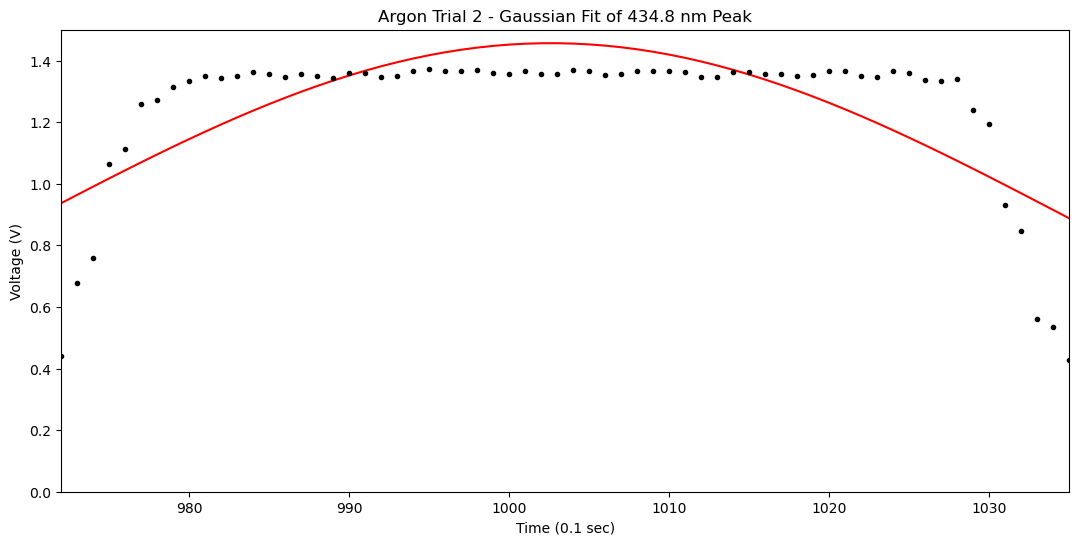

The time value corresponding to the wavelength 434.8 nm is: 1002 +/- 1 deciseconds.


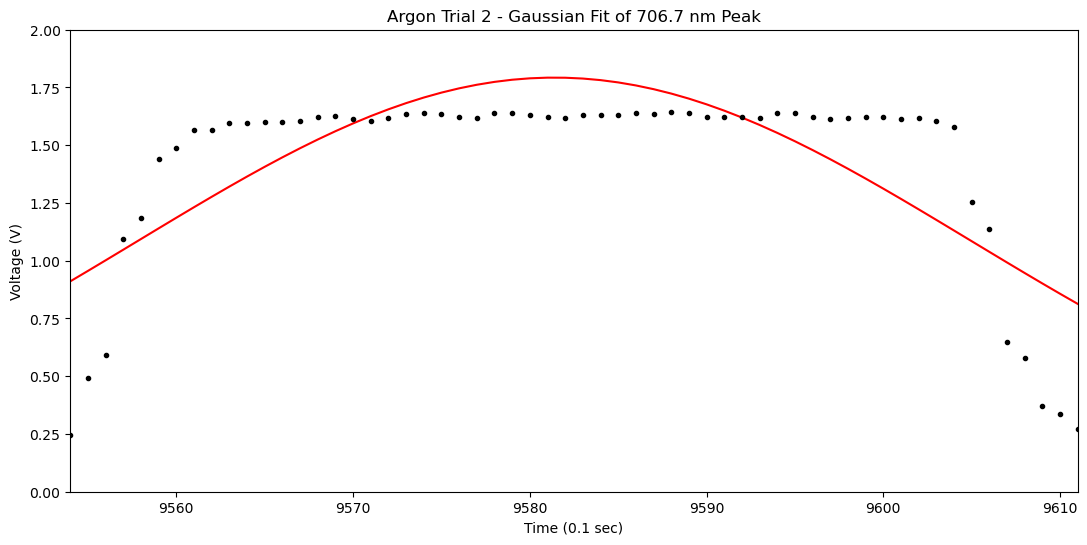

The time value corresponding to the wavelength 706.7 nm is: 9581.3 +/- 0.9 deciseconds.


In [16]:
# For the first peak:
# A peak was found between the time values 972-1035
# These values correspond to argon's 434.8 nm peak

# Initial Values for 434.8 nm peak
argon_trial2_peak1_param0 = (300, 2000, 10)

# Fitting the 434.8 nm peak to the Gaussian
argon_trial2_paramFit1, argon_trial2_paramErr1 = optimize.curve_fit(GaussianFit,
                                                            argon_runtime2[972:1036],
                                                            argon_run2[972:1036],
                                                            argon_trial2_peak1_param0)

# Calculating values of the gaussian
argon_trial2_fit1 = GaussianFit(argon_runtime2[972:1036],
                            argon_trial2_paramFit1[0],
                            argon_trial2_paramFit1[1],
                            argon_trial2_paramFit1[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([972,1035])
plt.ylim([0,1.5])
plt.plot(argon_runtime2[972:1036], argon_trial2_fit1, color='r')
plt.plot(argon_runtime2, argon_run2, '.', color='k')
plt.title("Argon Trial 2 - Gaussian Fit of 434.8 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 434.8 nm is:", str(argon_trial2_paramFit1[0])[:4],
      "+/-", str(argon_trial2_paramErr1[0][0])[:1], "deciseconds.")


# For the second peak:
# A peak was found between the time values 9554-9611
# These values correspond to argon's 706.7 nm peak

# Initial Values for 706.7 nm peak
argon_trial2_peak2_param0 = (100, 10000, 10)

# Fitting the  nm peak to the Gaussian
argon_trial2_paramFit2, argon_trial2_paramErr2 = optimize.curve_fit(GaussianFit,
                                                            argon_runtime2[9554:9612],
                                                            argon_run2[9554:9612],
                                                            argon_trial2_peak2_param0)

# Calculating values of the gaussian
argon_trial2_fit2 = GaussianFit(argon_runtime2[9554:9612],
                            argon_trial2_paramFit2[0],
                            argon_trial2_paramFit2[1],
                            argon_trial2_paramFit2[2])

# Plotting the peak with the gaussian fit over it
plt.figure(figsize=(13,6))
plt.xlim([9554,9611])
plt.ylim([0,2])
plt.plot(argon_runtime2[9554:9612], argon_trial2_fit2, color='r')
plt.plot(argon_runtime2, argon_run2, '.', color='k')
plt.title("Argon Trial 2 - Gaussian Fit of 706.7 nm Peak")
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("The time value corresponding to the wavelength 706.7 nm is:", str(argon_trial2_paramFit2[0])[:6],
      "+/-", str(argon_trial2_paramErr2[0][0])[:3], "deciseconds.")

## Converting Time to Wavelength:

### In order to get the x-axis from time into wavelength, the two must be related through a function. A function of wavelength as a function of time should be the linear function $\, \lambda(t) = mt\, +\, b\, $. This means that the slope of this function will give the conversion factor between time and wavelength. This slope can be calculated as follows:

## $ m = \frac{\Delta{\lambda}}{\Delta{t}} = \frac{\lambda_{2}\, -\, \lambda_{1}}{t_{2}\, -\, t_{1}} = \frac{706.7\, nm\, -\, 434.8\, nm}{9581.3\, ds\, -\, 1002\, ds} $
## $ m = 3.169\, x\, 10^{-2}\, \frac{nm}{ds}$

### Calculating Error in Slope:

## $ \sigma_{m} = \sqrt{(\frac{\partial{m}}{\partial{(\Delta{\lambda})}}\sigma_{\Delta{\lambda}})^{2}\, +\, (\frac{\partial{m}}{\partial{(\Delta{t})}}\sigma_{\Delta{t}})^{2}} $

## $ \sigma_{m} = \sqrt{(\frac{\sigma_{\Delta{\lambda}}}{\Delta{t}})^{2}\, +\, (-\frac{\Delta{\lambda}}{\Delta{t^{2}}}\sigma_{\Delta{t}})^{2}} $

## $\, \sigma_{\Delta{\lambda}} = 0.05\, $ and $\, \sigma_{\Delta{t}} = 2 \, $, giving:

## $ \sigma_{m} = \sqrt{(\frac{0.05}{9581.3\, ds\, -\, 1002\, ds})^{2}\, +\, (-(\frac{706.7\, nm\, -\, 434.8\, nm}{({9581.3\, ds\, -\, 1002\, ds})^{2}})2)^{2}} $

## $ \sigma_{m} = 0.001\, x\, 10^{-2} $



### In order for time to be properly converted to wavelength, the wavelength must be shifted by a certain number due to the data collection starting around 400 nm. In terms of the linear equation, this is the y-intercept. Using the data from the second trial, the y-intercept will be calculated.

### The y-intercept was calculated as follows for the 706.7 nm peak:

### $ b = (706.7\, nm)\, -\, (3.169\, x\, 10^{-2})(9581.3\, ds) $

### $ b = 403.1\, nm $

## $ \sigma_{b} = \sqrt{(\frac{\partial{b}}{\partial{(t)}}\sigma_{\Delta{t}})^{2}\, +\, (\frac{\partial{b}}{\partial{(m)}}\sigma_{m})^{2}}\, +\, \sigma_{\lambda} $

## $ \sigma_{b} = \sqrt{(m\sigma_{t})^{2}\, +\, (t\sigma_{m})^{2}}\, +\, \sigma_{\lambda} $

## $ \sigma_{b} = \sqrt{(3.169\, x\, 10^{-2}\, \frac{nm}{ds}*2)^{2}\, +\, (9581.3\, ds*0.001\, x\, 10^{-2})^{2}}\, +\, 0.05 $

## $ \sigma_{b} = 0.2 $

## The average slope from both trials is calculated and the error is as follows:

## $ m_{avg} = 3.168\, x\, 10^{-2}\, \frac{nm}{ds} $

## $ \sigma_{m_{avg}} = \sqrt{(m_{1}\, -\, m_{avg})^{2}\, +\, (m_{2}\, -\, m_{avg})^{2}} $

## $ \sigma_{m_{avg}} = \sqrt{(3.166\, x\, 10^{-2}\, \frac{nm}{ds}\, -\, 3.168\, x\, 10^{-2}\, \frac{nm}{ds})^{2}\, +\, (3.169\, x\, 10^{-2}\, \frac{nm}{ds} -\, 3.168\, x\, 10^{-2}\, \frac{nm}{ds})^{2}} $

## $ \sigma_{m_{avg}} = 0.002\, x\, 10^{-2} $

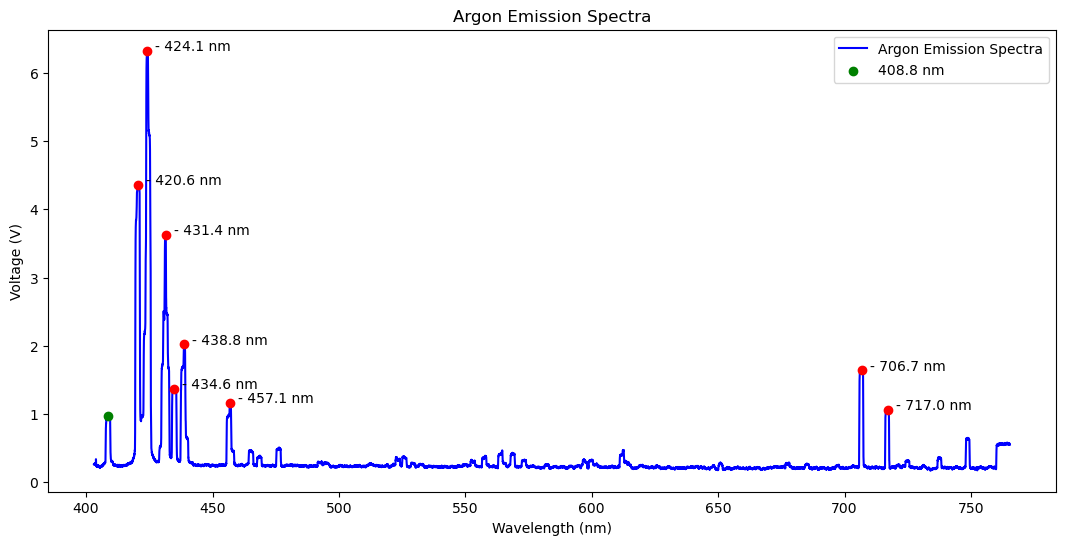

In [17]:
# Calculated slope and intercept
average_argon_slope = (3.166e-2 + 3.169e-2) / 2  #nm/ds
argon_intercept = 403.1  # nm

# Calculating Wavelength
argon_wavelength = LinearFunc(argon_runtime2, average_argon_slope, argon_intercept)

# Plotting
plt.figure(figsize=(13,6))
plt.plot(argon_wavelength, argon_run2, color='b', zorder=1,label='Argon Emission Spectra')

# Should be 413.1 nm
plt.scatter(argon_wavelength[181], argon_run2[181], color='g', label='408.8 nm')

# Should be 422.8 nm
plt.text(argon_wavelength[653], argon_run2[553], '- 420.6 nm')
plt.scatter(argon_wavelength[553], argon_run2[553], color='r')

# Should be 427.7 nm
plt.text(argon_wavelength[764], argon_run2[664], '- 424.1 nm')
plt.scatter(argon_wavelength[664], argon_run2[664], color='r')

# Should be 434.8 nm
plt.text(argon_wavelength[994], argon_run2[894], '- 431.4 nm')
plt.scatter(argon_wavelength[894], argon_run2[894], color='r')

# Should be 437.0 nm
plt.text(argon_wavelength[1095], argon_run2[995], '- 434.6 nm')
plt.scatter(argon_wavelength[995], argon_run2[995], color='r')

# Should be 442.6 nm
plt.text(argon_wavelength[1227], argon_run2[1127], '- 438.8 nm')
plt.scatter(argon_wavelength[1127], argon_run2[1127], color='r')

# Should be 460.9 nm
plt.text(argon_wavelength[1804], argon_run2[1704], '- 457.1 nm')
plt.scatter(argon_wavelength[1704], argon_run2[1704], color='r')

# Should be 696.5 nm
plt.text(argon_wavelength[9688], argon_run2[9588], '- 706.7 nm')
plt.scatter(argon_wavelength[9588], argon_run2[9588], color='r')

# Should be 706.7 nm
plt.text(argon_wavelength[10010], argon_run2[9910], '- 717.0 nm')
plt.scatter(argon_wavelength[9910], argon_run2[9910], color='r')

plt.title("Argon Emission Spectra")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

# $***************************************$